In [ ]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Resume Projects/Lexis Nexis Project/flight_history.csv')
test = pd.read_csv('/content/drive/MyDrive/Resume Projects/Lexis Nexis Project/flight_test.csv')

In [ ]:
# Display the data
history.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [ ]:
test.head()

,uniqueid,year,month,day,sched_dep_time,sched_arr_time,carrier,flight,tailnum,origin,dest,hour,minute,time_hour,lateflight
0,1,2013,7,14,1440,1749,DL,1902,N965DL,LGA,PBI,14,40,2013-07-14 14:00:00,0.0
1,2,2013,7,7,945,1305,AA,1871,N3AJAA,LGA,MIA,9,45,2013-07-07 09:00:00,0.0
2,3,2013,7,5,1200,1435,DL,1947,N608DA,LGA,ATL,12,0,2013-07-05 12:00:00,0.0
3,4,2013,7,22,650,808,EV,5811,N16919,EWR,BUF,6,50,2013-07-22 06:00:00,1.0
4,5,2013,7,2,1630,1930,AA,881,N3FCAA,JFK,DFW,16,30,2013-07-02 16:00:00,1.0


In [ ]:
# Data Info
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166158 entries, 0 to 166157
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            166158 non-null  int64  
 1   month           166158 non-null  int64  
 2   day             166158 non-null  int64  
 3   dep_time        161275 non-null  float64
 4   sched_dep_time  166158 non-null  int64  
 5   dep_delay       161275 non-null  float64
 6   arr_time        161057 non-null  float64
 7   sched_arr_time  166158 non-null  int64  
 8   arr_delay       160678 non-null  float64
 9   carrier         166158 non-null  object 
 10  flight          166158 non-null  int64  
 11  tailnum         164637 non-null  object 
 12  origin          166158 non-null  object 
 13  dest            166158 non-null  object 
 14  air_time        160678 non-null  float64
 15  distance        166158 non-null  int64  
 16  hour            166158 non-null  int64  
 17  minute    

### Check for duplicates

In [ ]:
# Check for duplicates
duplicates = history.duplicated()
history['Is duplicated'] = duplicates
history['Is duplicated'].value_counts()

False    166158
Name: Is duplicated, dtype: int64

### There are no duplicates in the dataset.

In [ ]:
history.drop(['Is duplicated'],axis =1, inplace = True)

#**Data Preprocessing - Handling Missing Values**

In [ ]:
# Check for missing values
missing = round(history.isnull().sum()/history.shape[0]*100,2)
missing

year              0.00
month             0.00
day               0.00
dep_time          2.94
sched_dep_time    0.00
dep_delay         2.94
arr_time          3.07
sched_arr_time    0.00
arr_delay         3.30
carrier           0.00
flight            0.00
tailnum           0.92
origin            0.00
dest              0.00
air_time          3.30
distance          0.00
hour              0.00
minute            0.00
time_hour         0.00
dtype: float64

In [ ]:
print('The no of missing values in dep_time is ',history.isnull().sum()['dep_time'], 'and % of missing values is',missing['dep_time'],'%')
print('The no of missing values in dep_delay is ',history.isnull().sum()['dep_delay'], 'and % of missing values is',missing['dep_delay'],'%')
print('The no of missing values in arr_time is ',history.isnull().sum()['arr_time'], 'and % of missing values is',missing['arr_time'],'%')
print('The no of missing values in arr_delay is ',history.isnull().sum()['arr_delay'], 'and % of missing values is',missing['arr_delay'],'%')
print('The no of missing values in air_time is ',history.isnull().sum()['air_time'], 'and % of missing values is',missing['air_time'],'%')
print('The no of missing values in tailnum is ',history.isnull().sum()['tailnum'], 'and % of missing values is',missing['tailnum'],'%')



The no of missing values in dep_time is  4883 and % of missing values is 2.94 %
The no of missing values in dep_delay is  4883 and % of missing values is 2.94 %
The no of missing values in arr_time is  5101 and % of missing values is 3.07 %
The no of missing values in arr_delay is  5480 and % of missing values is 3.3 %
The no of missing values in air_time is  5480 and % of missing values is 3.3 %
The no of missing values in tailnum is  1521 and % of missing values is 0.92 %


In [ ]:
# Fill the missing values in Tailnum Field as UNKNOWN
history['tailnum'] = history['tailnum'].fillna('Unknown')

In [ ]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166158 entries, 0 to 166157
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            166158 non-null  int64  
 1   month           166158 non-null  int64  
 2   day             166158 non-null  int64  
 3   dep_time        161275 non-null  float64
 4   sched_dep_time  166158 non-null  int64  
 5   dep_delay       161275 non-null  float64
 6   arr_time        161057 non-null  float64
 7   sched_arr_time  166158 non-null  int64  
 8   arr_delay       160678 non-null  float64
 9   carrier         166158 non-null  object 
 10  flight          166158 non-null  int64  
 11  tailnum         166158 non-null  object 
 12  origin          166158 non-null  object 
 13  dest            166158 non-null  object 
 14  air_time        160678 non-null  float64
 15  distance        166158 non-null  int64  
 16  hour            166158 non-null  int64  
 17  minute    

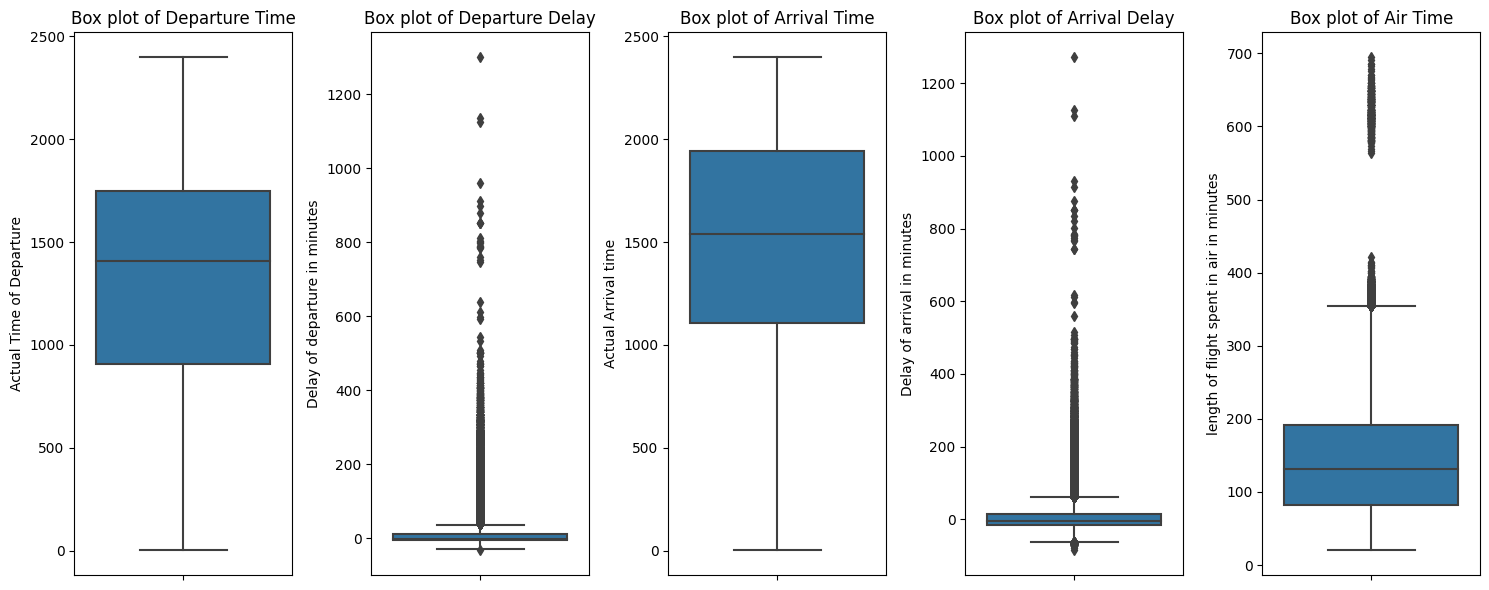

In [ ]:
# Box Plot - To analyze columns
plt.figure(figsize=(15,6))
plt.subplot(1,5,1)
sns.boxplot(y='dep_time', data = history)
plt.title('Box plot of Departure Time')
plt.ylabel('Actual Time of Departure')

plt.subplot(1,5,2)
sns.boxplot(y='dep_delay', data= history)
plt.title('Box plot of Departure Delay')
plt.ylabel('Delay of departure in minutes')

plt.subplot(1,5,3)
sns.boxplot(y='arr_time', data = history)
plt.title('Box plot of Arrival Time')
plt.ylabel('Actual Arrival time')

plt.subplot(1,5,4)
sns.boxplot(y='arr_delay', data= history)
plt.title('Box plot of Arrival Delay')
plt.ylabel('Delay of arrival in minutes')

plt.subplot(1,5,5)
sns.boxplot(y='air_time', data = history)
plt.title('Box plot of Air Time')
plt.ylabel('length of flight spent in air in minutes')

plt.tight_layout()
plt.show()



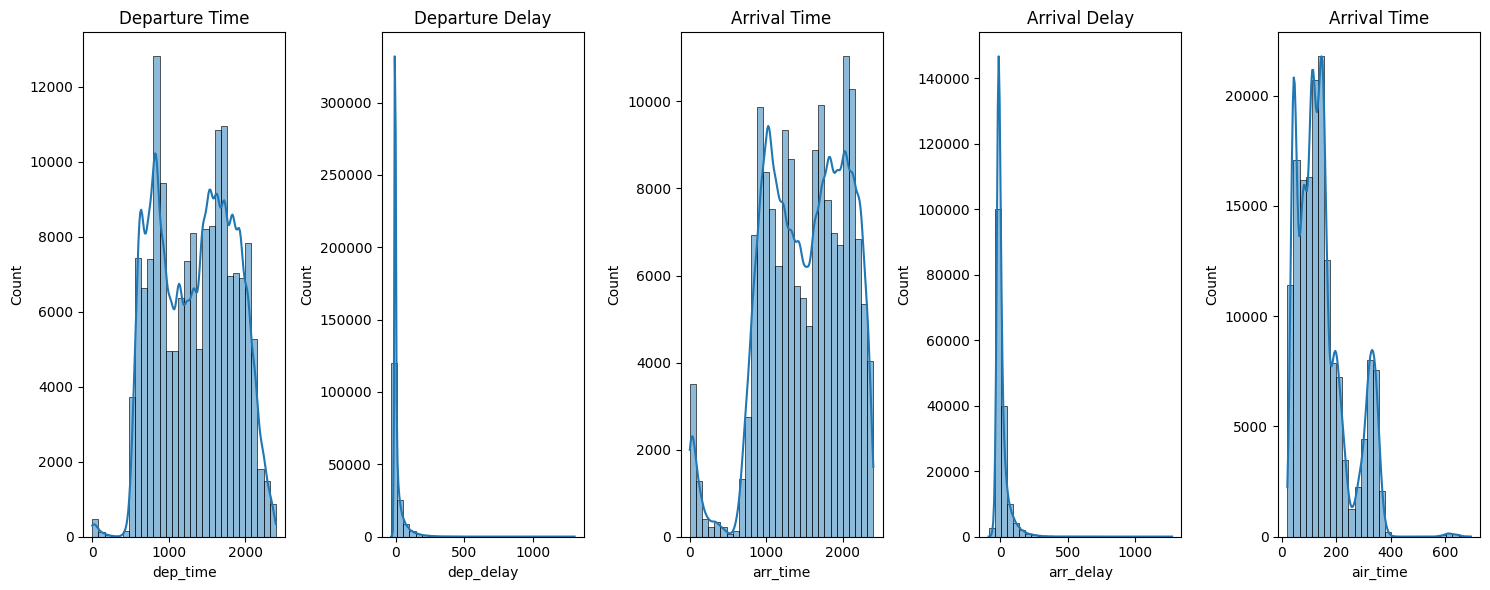

In [ ]:

# Histograms - To analyze columns with missing values
plt.figure(figsize=(15,6))
plt.subplot(1,5,1)
sns.histplot(history['dep_time'], bins =30, kde=True)
plt.title('Departure Time')

plt.subplot(1,5,2)
sns.histplot(history['dep_delay'], bins =30, kde=True)
plt.title('Departure Delay')

plt.subplot(1,5,3)
sns.histplot(history['arr_time'], bins =30, kde=True)
plt.title('Arrival Time')

plt.subplot(1,5,4)
sns.histplot(history['arr_delay'], bins =30, kde=True)
plt.title('Arrival Delay')

plt.subplot(1,5,5)
sns.histplot(history['air_time'], bins =30, kde=True)
plt.title('Arrival Time')

plt.tight_layout()
plt.show()

From the above Box plot and Histogram we generated for we can conclude the following:
1. The dep_time field is normally distributed with very little outliers. Hence we can use the mean to fill the missing values
2. The dep_delay field has large number of positive outliers and the histogram indicates it is positively skewed. Hence we can use the median to fill the missing values
3. The arr_time filed is normally distributed with no outliers. We can use mean to fill the missing values
4. The arr_delay field has a lot of positive outliers and is positively skewed. Hence we can use median to fill the missing values.
5. The Air Time field contains outliers and it is also positively skewed. Hence we can use the median to fill the outliers.

In [ ]:
round(history['dep_time'].mean(),0)

1352.0

In [ ]:
# Fill missing values with mean or median
history['dep_time'].fillna(value = round(history['dep_time'].mean(),0), inplace=True)
history['dep_delay'].fillna(value = round(history['dep_delay'].median(),0), inplace=True)
history['arr_time'].fillna(value = round(history['arr_time'].mean(),0), inplace=True)
history['arr_delay'].fillna(value = round(history['arr_delay'].median(),0), inplace=True)
history['air_time'].fillna(value =round(history['air_time'].mean(),0), inplace=True)


In [ ]:
round(history.isnull().sum()/history.shape[0]*100,2)

year              0.0
month             0.0
day               0.0
dep_time          0.0
sched_dep_time    0.0
dep_delay         0.0
arr_time          0.0
sched_arr_time    0.0
arr_delay         0.0
carrier           0.0
flight            0.0
tailnum           0.0
origin            0.0
dest              0.0
air_time          0.0
distance          0.0
hour              0.0
minute            0.0
time_hour         0.0
dtype: float64

### There are no Missing values in the History dataset.

In [ ]:
history.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,166158.0,166158.000000,166158.000000,166158.000000,166158.000000,166158.000000,166158.000000,166158.000000,166158.000000,166158.000000,166158.000000,166158.000000,166158.000000,166158.000000
mean,2013.0,3.551836,15.642515,1351.748191,1346.872128,13.283206,1503.950589,1539.488595,7.750533,1970.258651,150.578744,1026.744183,13.208964,25.975752
std,0.0,1.699779,8.724071,483.150268,468.257735,41.135629,528.066226,498.562131,45.287151,1655.041538,91.846051,726.054153,4.669139,19.279158
min,2013.0,1.000000,1.000000,1.000000,500.000000,-33.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,80.000000,5.000000,0.000000
25%,2013.0,2.000000,8.000000,917.000000,909.000000,-5.000000,1112.000000,1125.000000,-16.000000,553.000000,83.000000,502.000000,9.000000,7.000000
50%,2013.0,4.000000,16.000000,1352.000000,1400.000000,-1.000000,1517.000000,1600.000000,-4.000000,1464.000000,134.000000,872.000000,14.000000,29.000000
75%,2013.0,5.000000,23.000000,1739.000000,1730.000000,11.000000,1936.000000,1950.000000,14.000000,3697.000000,188.000000,1389.000000,17.000000,44.000000
max,2013.0,6.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


### Check for outliers in the data

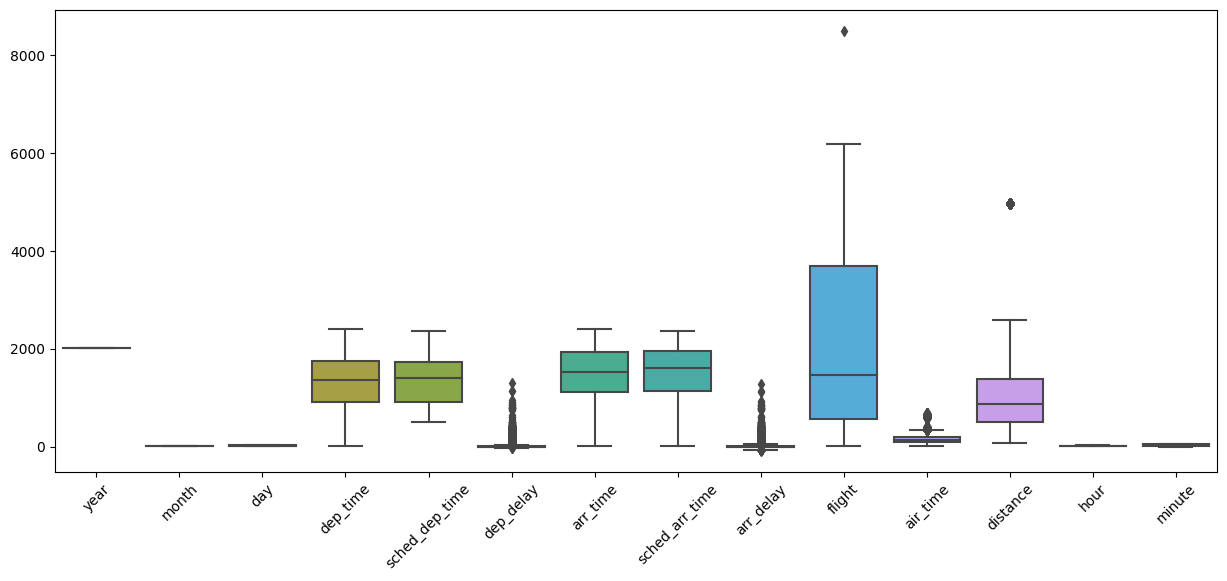

In [ ]:
# Box plots for numerical columns
plt.figure(figsize=(15, 6))
sns.boxplot(data=history.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.show()

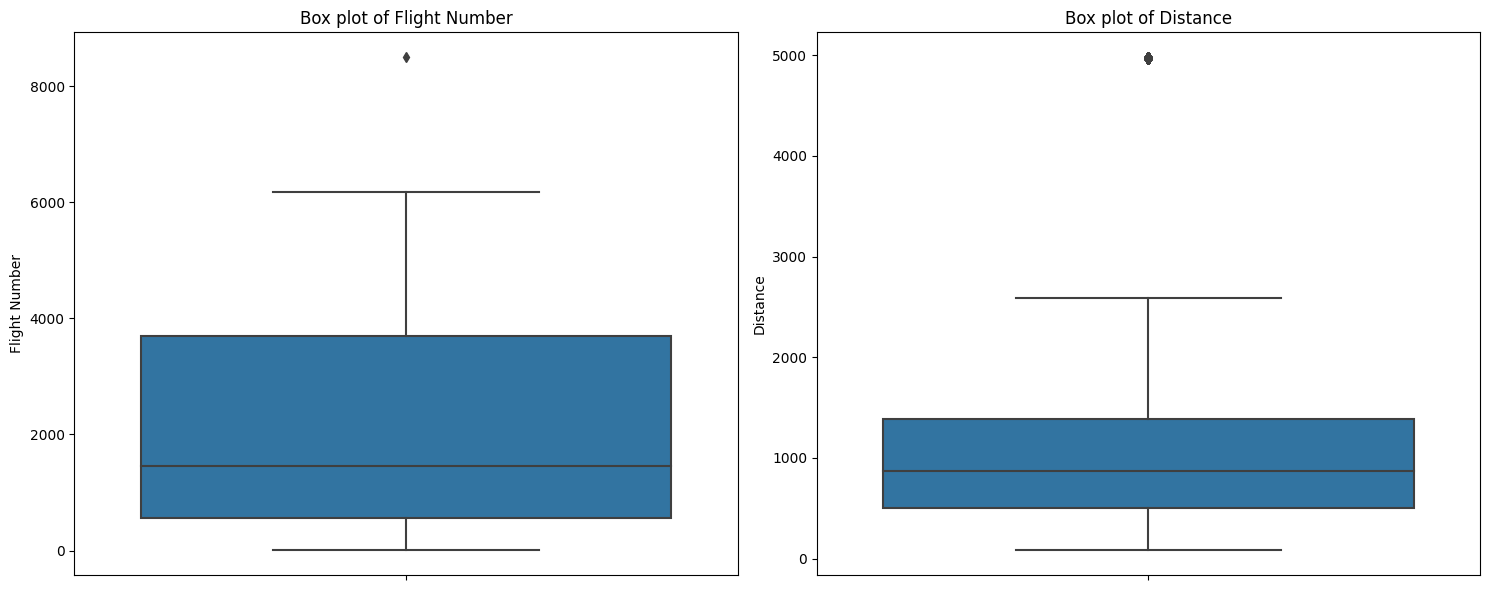

In [ ]:
# Box Plot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y='flight', data = history)
plt.title('Box plot of Flight Number')
plt.ylabel('Flight Number')

plt.subplot(1,2,2)
sns.boxplot(y='distance', data= history)
plt.title('Box plot of Distance')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

In [ ]:

# Number of Outliers present in the history dataset before outlier treatment
def count_outliers_iqr(data, columns):
    outliers_count = {}

    for column in columns:
        # Calculate IQR for the column
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers based on IQR
        outliers = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))

        # Count the number of outliers
        outliers_count[column] = outliers.sum()

    return outliers_count

#
columns_with_outliers = ['dep_delay', 'arr_delay', 'air_time', 'flight', 'distance']
outliers_result = count_outliers_iqr(history, columns_with_outliers)

# Display the number of outliers for each specified column
for column, count in outliers_result.items():
    print(f"Number of outliers in '{column}' column: {count}")


Number of outliers in 'dep_delay' column: 22907
Number of outliers in 'arr_delay' column: 15085
Number of outliers in 'air_time' column: 6000
Number of outliers in 'flight' column: 1
Number of outliers in 'distance' column: 362


#Outlier Treatment Using IQR

In [ ]:
columns_with_median = ['dep_delay', 'arr_delay', 'air_time','flight','distance']
# Function to apply IQR-based outlier treatment
def treat_outliers_with_iqr(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 -1.5* IQR
  upper_bound = Q3 + 1.5*IQR
  data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound),data[column].median(), data[column])
# Apply IQR-based outlier treatment for columns filled with median
for column in columns_with_median:
  treat_outliers_with_iqr(history,column)

In [ ]:
# To check if outliers still present
def count_outliers_iqr(data, columns):
    outliers_count = {}

    for column in columns:
        # Calculate IQR for the column
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers based on IQR
        outliers = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))

        # Count the number of outliers
        outliers_count[column] = outliers.sum()

    return outliers_count


columns_with_outliers = ['dep_delay', 'arr_delay', 'air_time', 'flight', 'distance']
outliers_result = count_outliers_iqr(history, columns_with_outliers)

# Display the number of outliers for each specified column
for column, count in outliers_result.items():
    print(f"Number of outliers in '{column}' column: {count}")


Number of outliers in 'dep_delay' column: 19889
Number of outliers in 'arr_delay' column: 9490
Number of outliers in 'air_time' column: 15285
Number of outliers in 'flight' column: 0
Number of outliers in 'distance' column: 0


## Outliers exist even after IQR Outlier Treatment
Number of outliers in 'dep_delay' column: 19889

Number of outliers in 'arr_delay' column: 8305

Number of outliers in 'air_time' column: 14973

Number of outliers in 'flight' column: 0

Number of outliers in 'distance' column: 0

So we will Explore Z-Score Method to eliminate the outliers present in the above three columns

Calculate z-scores for 'dep_delay', 'arr_delay', and 'air_time' and identify outliers based on a z-score threshold.

In [ ]:
#Z Score Method
from scipy.stats import zscore

z_scores_dep_delay = zscore(history['dep_delay'])
outliers_dep_delay = (abs(z_scores_dep_delay) > 3)

z_scores_arr_delay = zscore(history['arr_delay'])
outliers_arr_delay = (abs(z_scores_arr_delay) > 3)

z_scores_air_time = zscore(history['air_time'])
outliers_air_time = (abs(z_scores_air_time) > 3)


In [ ]:
print(outliers_dep_delay.sum())
print(outliers_arr_delay.sum())
print(outliers_air_time.sum())

4960
1136
0


In [ ]:
# Remove rows with outliers
history_no_outliers = history[~(outliers_dep_delay | outliers_arr_delay | outliers_air_time)]

# Display the updated DataFrame without outliers
history_no_outliers.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545.0,N14228,EWR,IAH,227.0,1400.0,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714.0,N24211,LGA,IAH,227.0,1416.0,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141.0,N619AA,JFK,MIA,160.0,1089.0,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725.0,N804JB,JFK,BQN,183.0,1576.0,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461.0,N668DN,LGA,ATL,116.0,762.0,6,0,2013-01-01 06:00:00


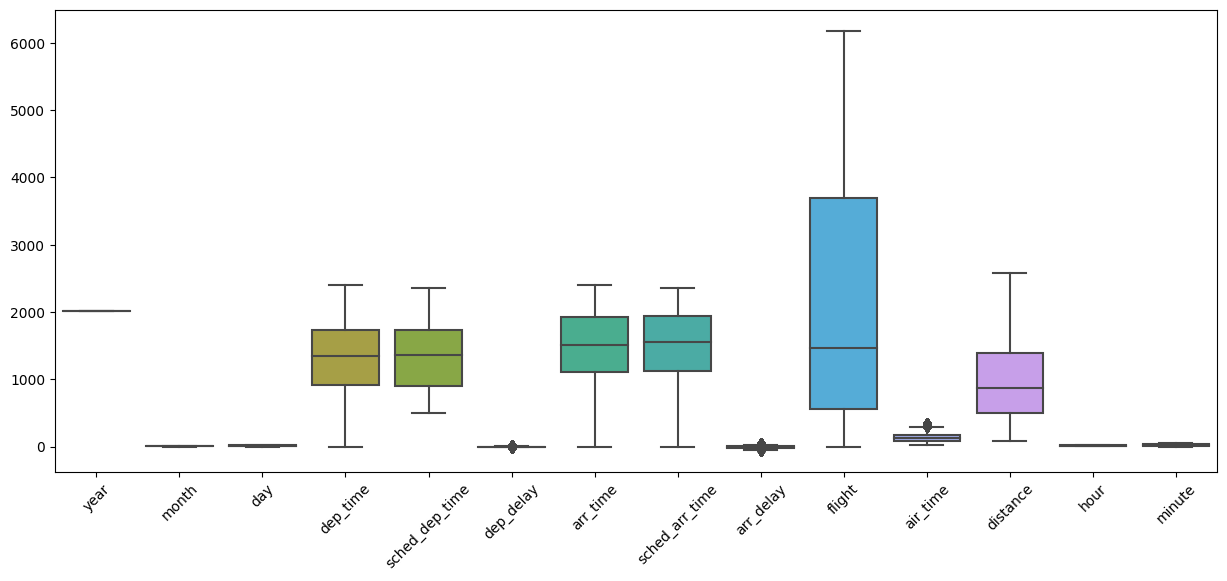

In [ ]:
# Box plots for numerical columns
plt.figure(figsize=(15, 6))
sns.boxplot(data=history_no_outliers.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.show()

In [ ]:
history_df = pd.DataFrame(history_no_outliers)
history_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545.0,N14228,EWR,IAH,227.0,1400.0,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714.0,N24211,LGA,IAH,227.0,1416.0,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141.0,N619AA,JFK,MIA,160.0,1089.0,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725.0,N804JB,JFK,BQN,183.0,1576.0,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461.0,N668DN,LGA,ATL,116.0,762.0,6,0,2013-01-01 06:00:00


# Handling Data type conversion

In [ ]:
history_df['dep_delay'] = history_df['dep_delay'].astype(int)
history_df['arr_delay'] = history_df['arr_delay'].astype(int)
history_df['time_hour'] = pd.to_datetime(history_df['time_hour'])


In [ ]:
#  generate day of week from time_hour column

history_df['day_of_week'] = history_df['time_hour'].dt.strftime('%w').astype(int)


['carrier', 'flight', 'tailnum', 'origin', 'dest', 'season']

In [ ]:
history_df['carrier'] = history_df['carrier'].astype('str')
history_df['flight'] = history_df['flight'].astype('str')
history_df['tailnum'] = history_df['tailnum'].astype('str')
history_df['origin'] = history_df['origin'].astype('str')
history_df['dest'] = history_df['dest'].astype('str')


In [ ]:
history_df.drop(['time_hour', 'year'], axis =1 , inplace = True)

In [ ]:
history_df['lateflight'] = (history_df['arr_delay'] > 0).astype(int)
history_df['Departure_Delay'] = (history_df['dep_delay'] > 0).astype(int)
history_df['duration'] = history_df['sched_arr_time'] - history_df['sched_dep_time']

In [ ]:
history_df.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,...,origin,dest,air_time,distance,hour,minute,day_of_week,lateflight,Departure_Delay,duration
0,1,1,517.0,515,2,830.0,819,11,UA,1545.0,...,EWR,IAH,227.0,1400.0,5,15,2,1,1,304
1,1,1,533.0,529,4,850.0,830,20,UA,1714.0,...,LGA,IAH,227.0,1416.0,5,29,2,1,1,301
2,1,1,542.0,540,2,923.0,850,33,AA,1141.0,...,JFK,MIA,160.0,1089.0,5,40,2,1,1,310
3,1,1,544.0,545,-1,1004.0,1022,-18,B6,725.0,...,JFK,BQN,183.0,1576.0,5,45,2,0,0,477
4,1,1,554.0,600,-6,812.0,837,-25,DL,461.0,...,LGA,ATL,116.0,762.0,6,0,2,0,0,237


In [ ]:
history_df['lateflight'].value_counts()

0    113130
1     47007
Name: lateflight, dtype: int64

In [ ]:
records = history_df.shape[0]
records

160137

# Exploratory Data Analysis and Meta Variable Construction

In [ ]:
# Total Arrival Delays and On time Arrival %
print('Percentage of Arrival Delays is',round(history_df['lateflight'].value_counts()[1]/records*100,2),'%')
print('Percentage of On Time Arrivals is',round(history_df['lateflight'].value_counts()[0]/records*100,2),'%')

Percentage of Arrival Delays is 29.35 %
Percentage of On Time Arrivals is 70.65 %


<Axes: xlabel='lateflight', ylabel='count'>

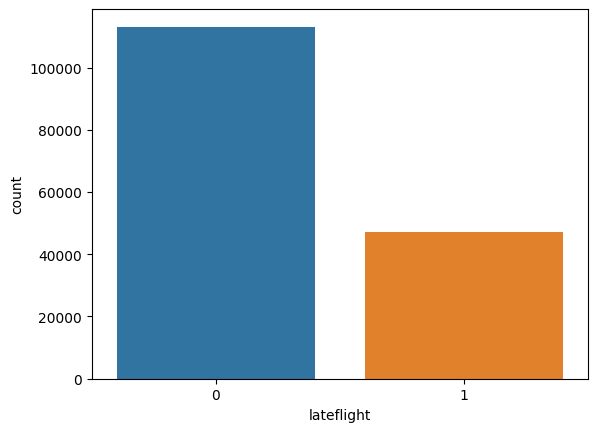

In [ ]:
sns.countplot(x='lateflight',data=history_df)

The history_df dataset is mildly imbalanced. As we can see below:

Percentage of Arrival Delays is 29.96 %

Percentage of On Time Arrivals is 70.04 %

So we will have to consider techniques to handle imbalanced data and appropriate metrics to evaluate the models.

Text(0.5, 1.0, 'Distribution of distance in miles')

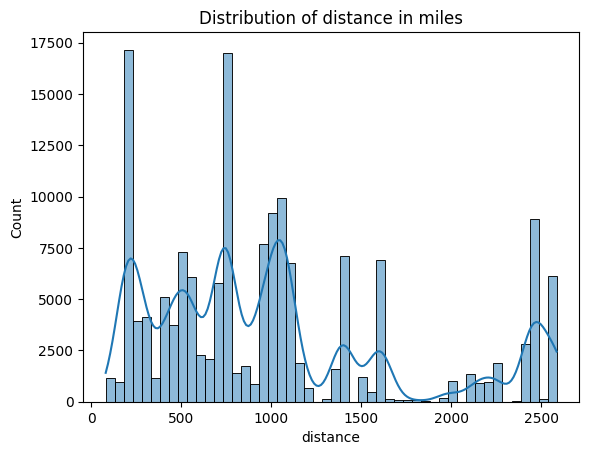

In [ ]:
sns.histplot(history_df['distance'], bins =50, kde =True)
plt.title('Distribution of distance in miles')

In [ ]:
history_df['distance'].describe()

count    160137.000000
mean       1018.477678
std         702.490864
min          80.000000
25%         502.000000
50%         872.000000
75%        1389.000000
max        2586.000000
Name: distance, dtype: float64



1.   The least distance travelled is 80 miles.
2.   The maximum distance traveeled is 2586 miles
3.   The average distance travelled across First 6 months of 2013 is 1021 miles
4.   There are certain distances where carriers have travelled almost 16000 times. They are ditance (180-230miles) and (750-800 miles)
5. Maximum Number of cariers have travelled distnace in the range of (80-1200 miles)






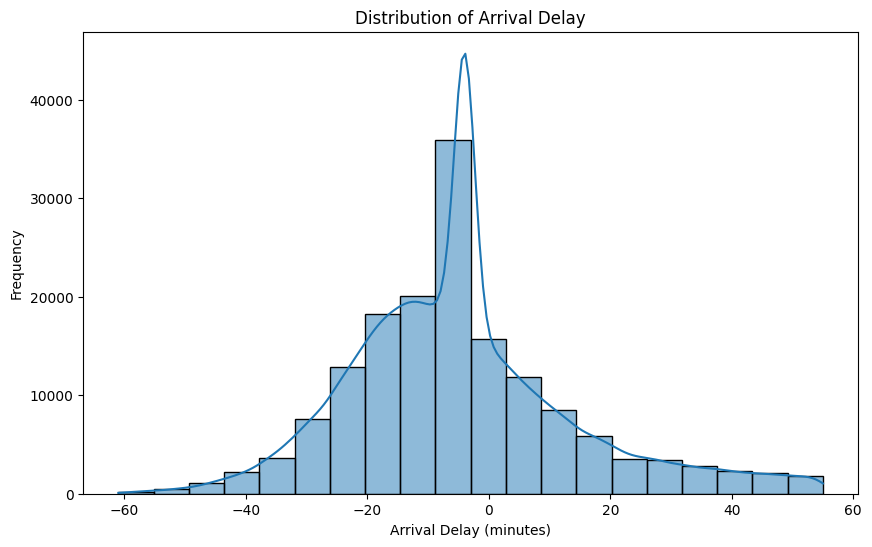

In [ ]:
# Arrival Delay Distribution
plt.figure(figsize=(10, 6))
sns.histplot(history_df['arr_delay'], bins=20, kde=True)
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# **CARRIER EDA**

### NO OF FLIGHTS PER CARRIER

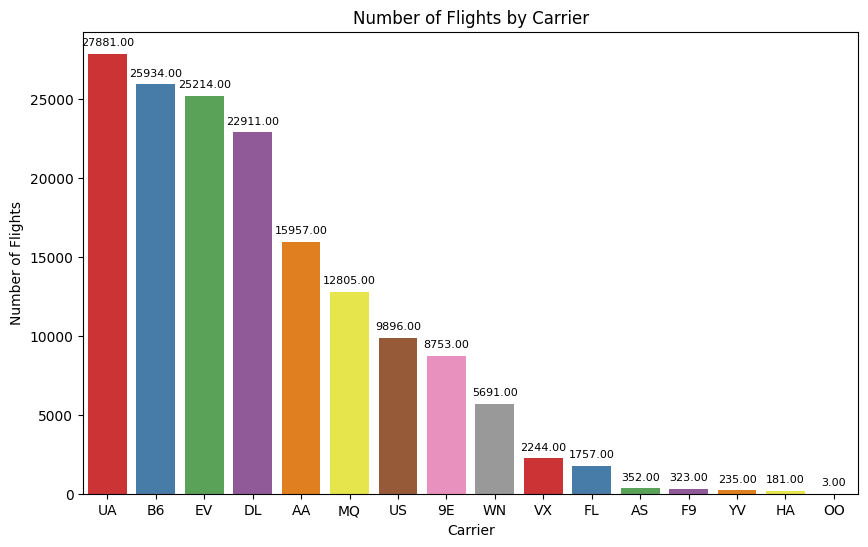

In [ ]:
#  number of flights by carrier
carrier_num = history_df.groupby('carrier').size().reset_index(name='num_flights')
carrier_num = carrier_num.sort_values(by='num_flights',ascending=False)
# Visulaize the number of flights from different carriers
# Plot the results
plt.figure(figsize=(10, 6))
plots =sns.barplot(x='carrier', y='num_flights', data=carrier_num, palette='Set1')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Number of Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.show()

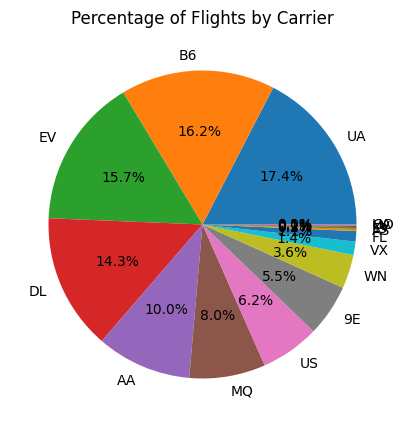

In [ ]:
# Visualization of number of flights from different carriers

plt.figure(figsize=(5, 5))
plt.pie(carrier_num['num_flights'], labels=carrier_num['carrier'], autopct='%1.1f%%')
plt.title('Percentage of Flights by Carrier')
plt.show()


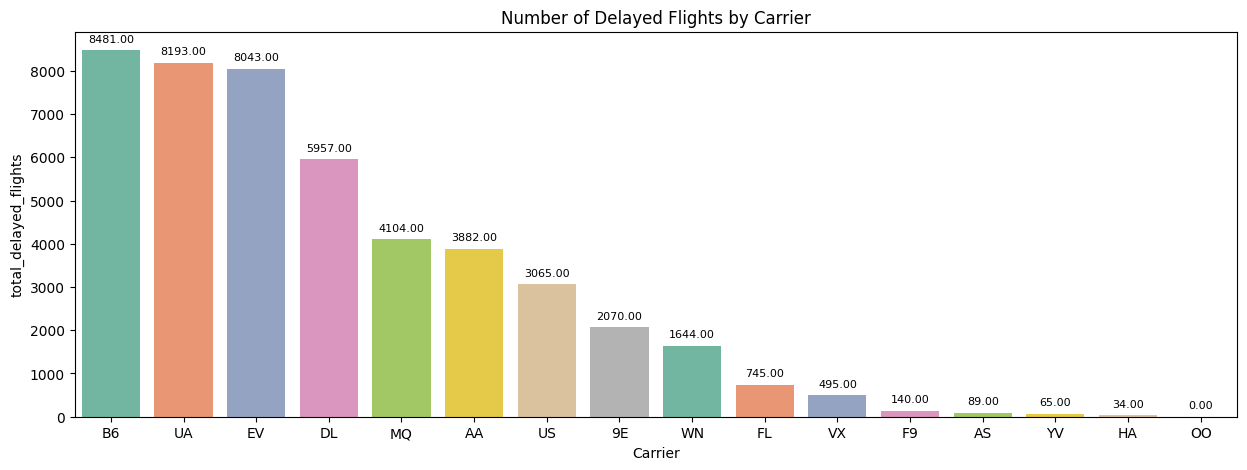

In [ ]:
# Total Number of Delayed Flights by carrier
total_carr_delayed_flights =  history_df.groupby('carrier')['lateflight'].sum().reset_index(name='total_delayed_flights')
total_carr_delayed_flights = total_carr_delayed_flights.sort_values(by='total_delayed_flights', ascending=False)
# Visulaize Average Departure Delay by cariier
plt.figure(figsize=(15,5))
plots = sns.barplot(x=total_carr_delayed_flights['carrier'], y=total_carr_delayed_flights['total_delayed_flights'],  data = total_carr_delayed_flights,palette='Set2')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')

plt.title('Number of Delayed Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('total_delayed_flights')
plt.show()

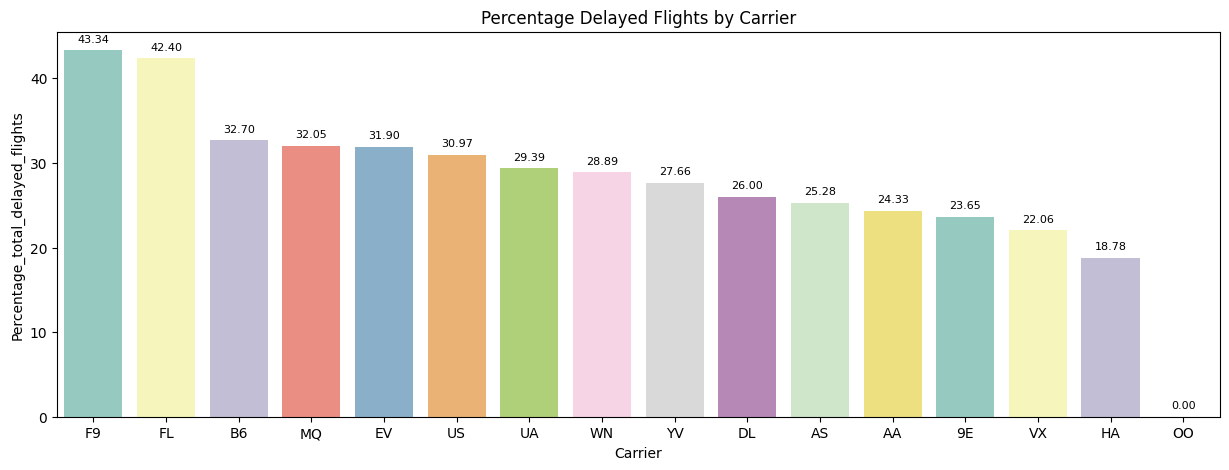

In [ ]:
# Percentage of delayed flights by Carrier
percentage_delayed_carrier = history_df.groupby('carrier')['lateflight'].mean().reset_index(name ='Delayed%')
percentage_delayed_carrier['Delayed%'] = (percentage_delayed_carrier['Delayed%'] * 100).round(2)
percentage_delayed_carrier = percentage_delayed_carrier.sort_values(by='Delayed%', ascending= False)

# Visulaize
plt.figure(figsize=(15,5))
plots = sns.barplot(x='carrier', y='Delayed%',  data = percentage_delayed_carrier,palette='Set3')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')

plt.title('Percentage Delayed Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Percentage_total_delayed_flights')
plt.show()

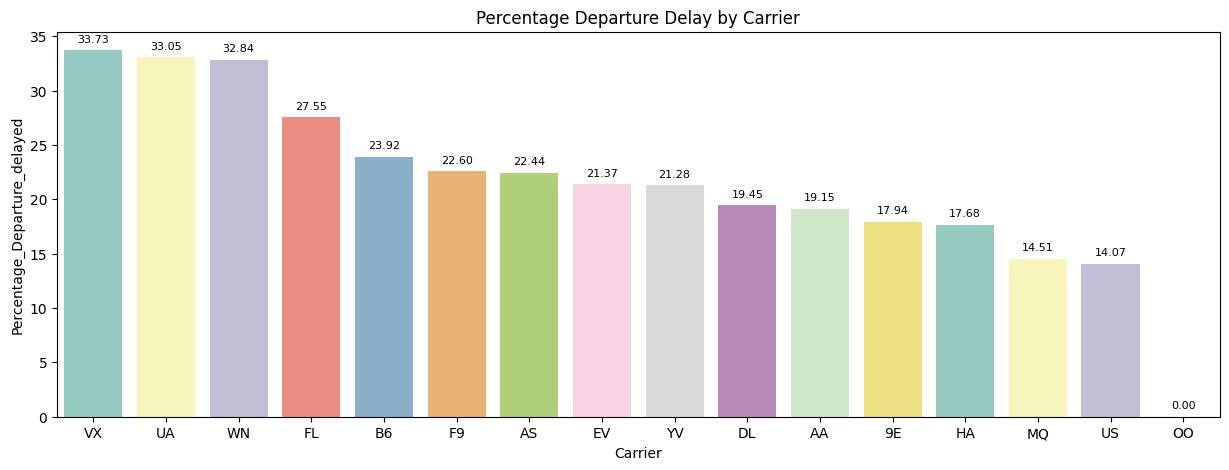

In [ ]:
# Find the percentage of departure delay by each carrier (Note dep_delay>0)
carrier_dep_late = history_df.groupby('carrier')['Departure_Delay'].mean().reset_index(name ='Carrier_Deaprted_late_perc')
carrier_dep_late['Carrier_Deaprted_late_perc'] = (carrier_dep_late['Carrier_Deaprted_late_perc'] * 100).round(2)
carrier_dep_late = carrier_dep_late.sort_values(by='Carrier_Deaprted_late_perc', ascending= False)
carrier_dep_late
# Visulaize
plt.figure(figsize=(15,5))
plots = sns.barplot(x='carrier', y='Carrier_Deaprted_late_perc',  data = carrier_dep_late,palette='Set3')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')

plt.title('Percentage Departure Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Percentage_Departure_delayed')
plt.show()


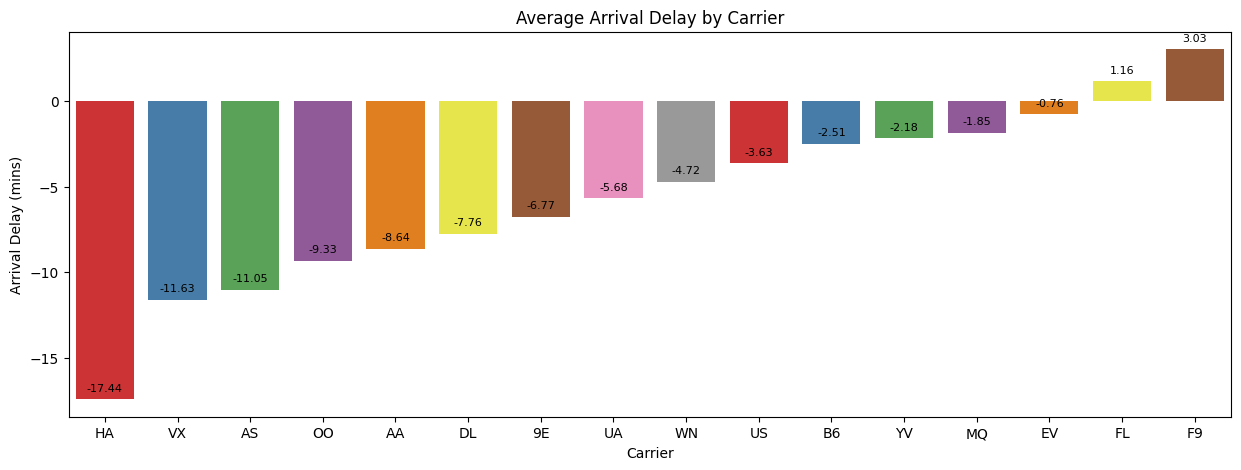

In [ ]:
# Average Arrival Delay by Carrier
avg_arr_delay_car = history_df.groupby('carrier')['arr_delay'].mean().reset_index(name ='arrival_delay')
avg_arr_delay_car['arrival_delay'] = round(avg_arr_delay_car['arrival_delay'],2)
avg_arr_delay_car = avg_arr_delay_car.sort_values(by='arrival_delay')

# Visulaize Average Arrival Delay by cariier
plt.figure(figsize=(15,5))
plots =sns.barplot(x=avg_arr_delay_car['carrier'], y=avg_arr_delay_car['arrival_delay'],  data = avg_arr_delay_car,palette='Set1')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (mins)')
plt.show()

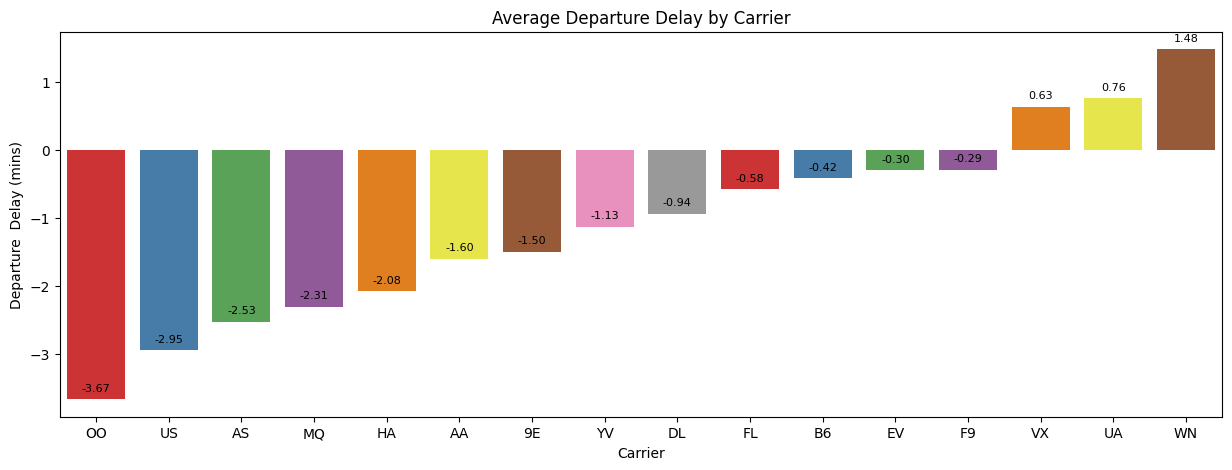

In [ ]:
# Average Departure Delay by Carrier
avg_dep_delay_car = history_df.groupby('carrier')['dep_delay'].mean().reset_index(name ='dep_delay')
avg_dep_delay_car['dep_delay'] = round(avg_dep_delay_car['dep_delay'],2)
avg_dep_delay_car = avg_dep_delay_car.sort_values(by='dep_delay')

# Visulaize Average Departure Delay by cariier
plt.figure(figsize=(15,5))
plots = sns.barplot(x=avg_dep_delay_car['carrier'], y=avg_dep_delay_car['dep_delay'],  data = avg_dep_delay_car,palette='Set1')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Average Departure Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Departure  Delay (mins)')
plt.show()

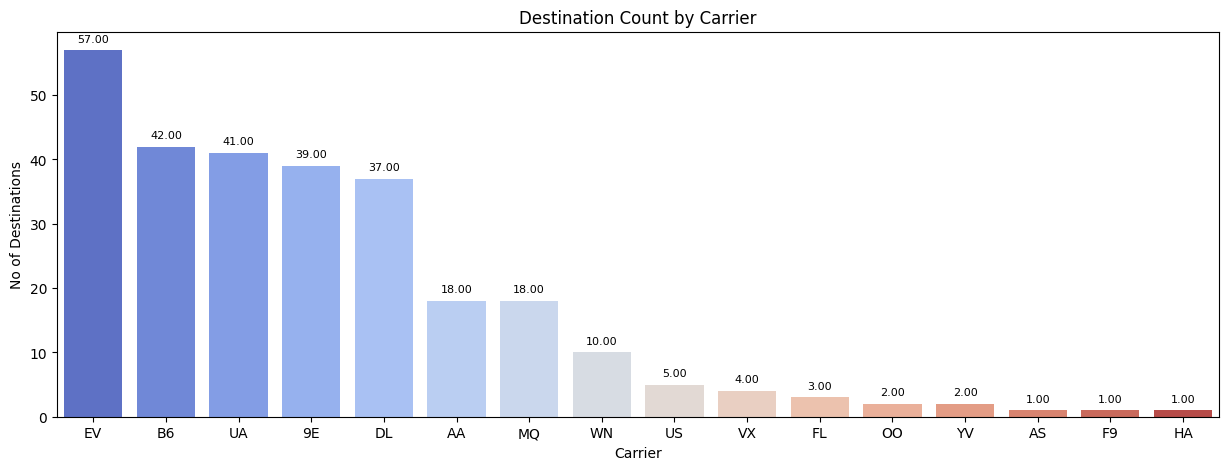

In [ ]:
# No of Destination by Carrier
car_destination = history_df.groupby('carrier')['dest'].nunique().reset_index(name ='Num_Dest_Carrier')
car_destination = car_destination.sort_values(by='Num_Dest_Carrier', ascending= False)

# Visulaize Average Departure Delay by cariier
plt.figure(figsize=(15,5))
plots = sns.barplot(x='carrier', y='Num_Dest_Carrier',  data = car_destination,palette='coolwarm')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Destination Count by Carrier')
plt.xlabel('Carrier')
plt.ylabel('No of Destinations')
plt.show()

In [ ]:
# Carrier Destination Arrival Delay Percentage
carrier_dest_arr_delay= history_df.groupby(['carrier','dest'])['lateflight'].mean().reset_index(name = 'Carr_Dest_Arrival_delay')
carrier_dest_arr_delay['Carr_Dest_Arrival_delay'] = round(carrier_dest_arr_delay['Carr_Dest_Arrival_delay']*100,2)
carrier_dest_arr_delay = carrier_dest_arr_delay.sort_values(by='Carr_Dest_Arrival_delay',ascending=False)
carrier_dest_arr_delay

,carrier,dest,Carr_Dest_Arrival_delay
226,UA,CLT,100.00
178,EV,PBI,66.67
148,EV,CAE,52.94
44,AA,IAH,52.27
39,AA,AUS,51.45
...,...,...,...
23,9E,MHT,0.00
111,DL,IND,0.00
5,9E,BTV,0.00
104,DL,BUF,0.00


In [ ]:
# CARRIER DAY OF WEEK ARRIVAL DELAY PERCENTAGE
carrier_Day_arr_delay= history_df.groupby(['carrier','day_of_week'])['lateflight'].mean().reset_index(name = 'Carr_Day_Arrival_delay')
carrier_Day_arr_delay['Carr_Day_Arrival_delay'] = round(carrier_Day_arr_delay['Carr_Day_Arrival_delay']*100,2)
carrier_Day_arr_delay = carrier_Day_arr_delay.sort_values(by='Carr_Day_Arrival_delay',ascending=False)
carrier_Day_arr_delay

,carrier,day_of_week,Carr_Day_Arrival_delay
44,F9,2,54.00
52,FL,3,49.81
53,FL,4,47.74
51,FL,2,45.76
45,F9,3,45.10
...,...,...,...
62,HA,6,11.54
20,AS,6,5.88
71,OO,6,0.00
70,OO,3,0.00


In [ ]:
# Combine all the Carrier Data
carrier_info = pd.merge(percentage_delayed_carrier,carrier_dep_late ,how='left', on='carrier')
carrier_info

,carrier,Delayed%,Carrier_Deaprted_late_perc
0,F9,43.34,22.60
1,FL,42.40,27.55
2,B6,32.70,23.92
3,MQ,32.05,14.51
4,EV,31.90,21.37
5,US,30.97,14.07
6,UA,29.39,33.05
7,WN,28.89,32.84
8,YV,27.66,21.28
9,DL,26.00,19.45


In [ ]:

# Assuming df is your DataFrame
carrier_info.rename(columns={'Delayed%': 'Carrier_Arrival_Delayed_Percentage'}, inplace=True)
carrier_info

,carrier,Carrier_Arrival_Delayed_Percentage,Carrier_Deaprted_late_perc
0,F9,43.34,22.60
1,FL,42.40,27.55
2,B6,32.70,23.92
3,MQ,32.05,14.51
4,EV,31.90,21.37
5,US,30.97,14.07
6,UA,29.39,33.05
7,WN,28.89,32.84
8,YV,27.66,21.28
9,DL,26.00,19.45


**ORIGIN AIRPORTS EDA**

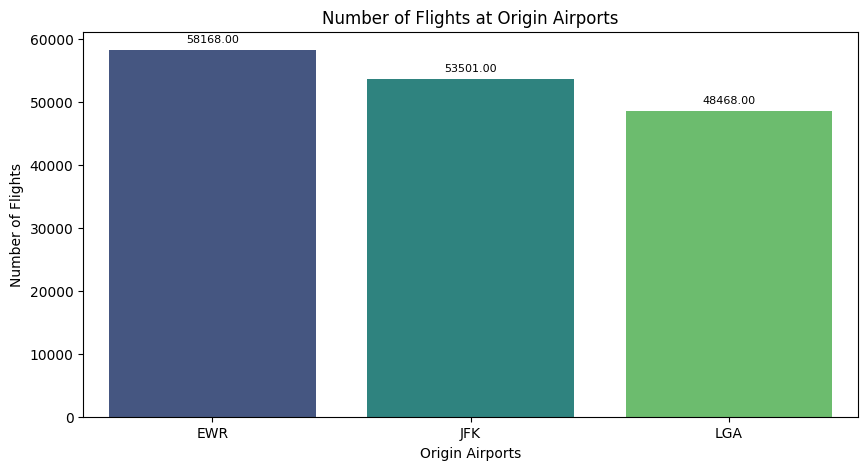

In [ ]:
# Number of flights from Origin Airports
origin_flights = history_df.groupby('origin').size().reset_index(name='num_flights')
origin_flights = origin_flights.sort_values(by='num_flights', ascending =False)
# Visulaize the number of flights from different origin airports
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='origin', y='num_flights', data=origin_flights, palette='viridis')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Number of Flights at Origin Airports')
plt.xlabel('Origin Airports')
plt.ylabel('Number of Flights')
plt.show()

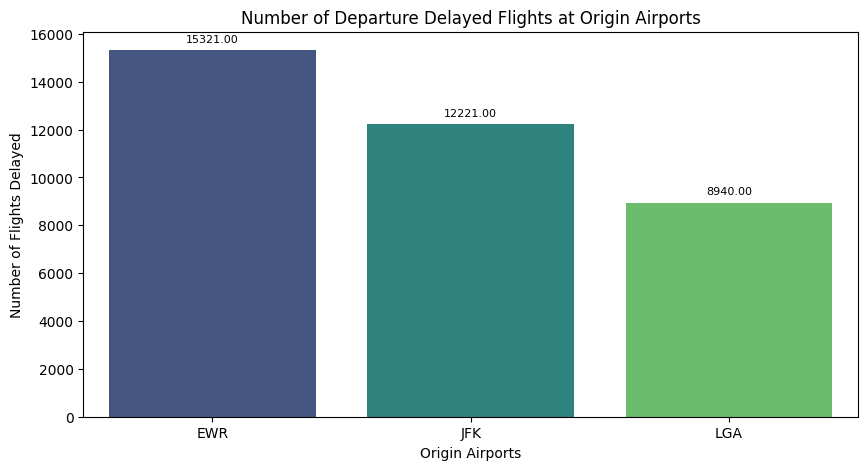

In [ ]:
# Number of Departure Delayed flights from Origin Airports
late_departures_by_origin = history_df[history_df['dep_delay'] > 0].groupby('origin')['dep_delay'].count().reset_index(name='Num_Late_Departures')
late_departures_by_origin = late_departures_by_origin.sort_values(by='Num_Late_Departures', ascending =False)
# Visulaize the number of flights from different origin airports
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='origin', y='Num_Late_Departures', data=late_departures_by_origin, palette='viridis')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Number of Departure Delayed Flights at Origin Airports')
plt.xlabel('Origin Airports')
plt.ylabel('Number of Flights Delayed')
plt.show()

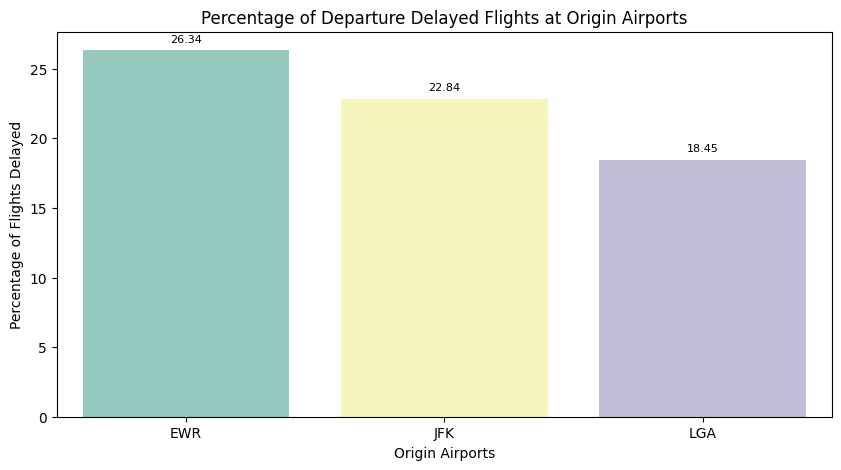

In [ ]:
# Percentage of Departure Delayed flights from Origin Airports
merge_df = pd.merge(origin_flights,late_departures_by_origin, how='inner',on='origin' )
merge_df['Percentage_Delayed'] = round(merge_df['Num_Late_Departures']/merge_df['num_flights']*100,2)
merge_df = merge_df.sort_values(by='Percentage_Delayed', ascending=False)
# Visulaize the number of flights from different origin airports
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='origin', y='Percentage_Delayed', data=merge_df, palette='Set3')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Percentage of Departure Delayed Flights at Origin Airports')
plt.xlabel('Origin Airports')
plt.ylabel('Percentage of Flights Delayed')
plt.show()

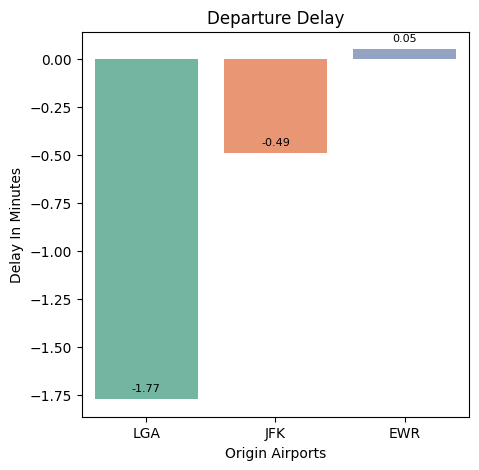

In [ ]:
# Average Departure Delay at Airport
origin_dep_delay = history_df.groupby('origin')['dep_delay'].mean().reset_index(name ='origin_dep_delay')
origin_dep_delay['origin_dep_delay'] = round(origin_dep_delay['origin_dep_delay'],2)
origin_dep_delay = origin_dep_delay.sort_values(by = 'origin_dep_delay')

# Visulaize the Average Departure  Delay at Airports
plt.figure(figsize=(5, 5))
plots = sns.barplot(x='origin', y='origin_dep_delay', data =origin_dep_delay, palette='Set2')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Departure Delay')
plt.xlabel('Origin Airports')
plt.ylabel('Delay In Minutes')
plt.show()

In [ ]:
# Rename  data
merge_df.rename(columns={'Percentage_Delayed':'Origin_Percentage_Delayed'}, inplace = True)
merge_df

,origin,num_flights,Num_Late_Departures,Origin_Percentage_Delayed
0,EWR,58168,15321,26.34
1,JFK,53501,12221,22.84
2,LGA,48468,8940,18.45


In [ ]:
# Combine Origin Airports data
origin_info = merge_df[['origin','Origin_Percentage_Delayed']]
origin_info

,origin,Origin_Percentage_Delayed
0,EWR,26.34
1,JFK,22.84
2,LGA,18.45


**DESTINATION EDA**

In [ ]:
# No of Unique Destinations
Unq_Destinations = history_df['dest'].nunique()
print('The number of Unique Destination Airports is :',Unq_Destinations)

The number of Unique Destination Airports is : 100


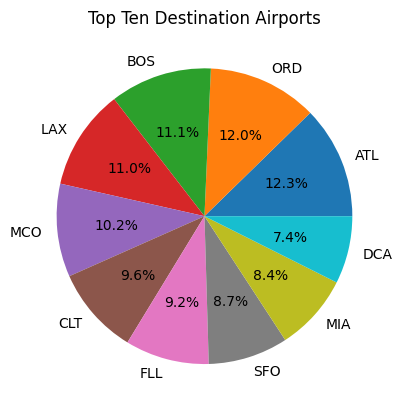

In [ ]:
# Top 10 Destination Airports
dest_airport = history_df.groupby('dest').size().reset_index(name='num_flights')
dest_airport = dest_airport.sort_values(by='num_flights', ascending=False)
dest_airport = dest_airport.head(10)
plt.pie(dest_airport['num_flights'], labels=dest_airport['dest'], autopct='%1.1f%%')
plt.title('Top Ten Destination Airports')
plt.show()


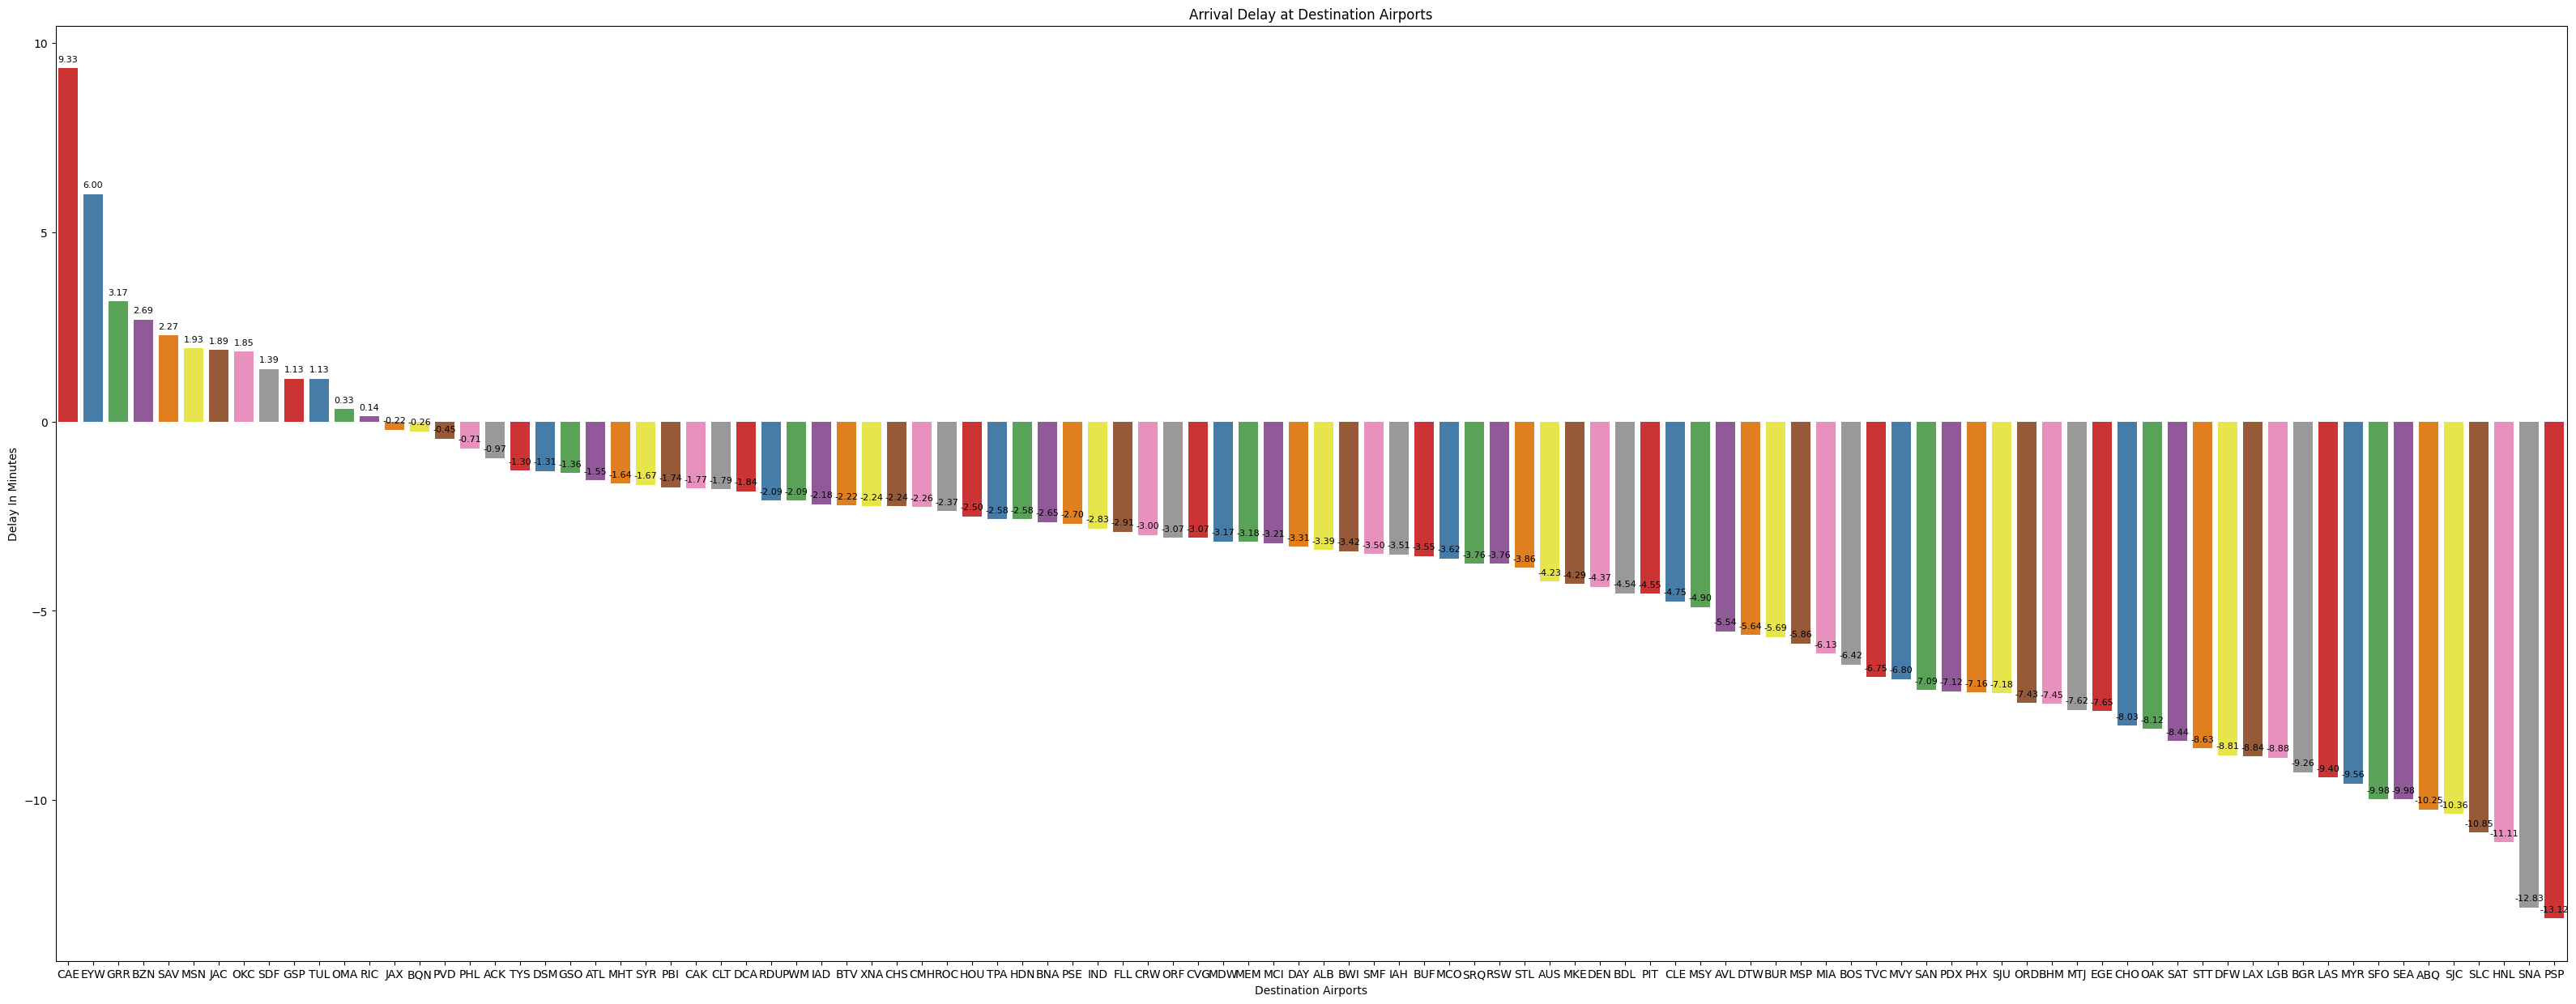

In [ ]:
# Arrival Delay By Destination Airports
dest_arr_delay = history_df.groupby('dest')['arr_delay'].mean().reset_index(name='avg_dest_arrival_delay')
dest_arr_delay['avg_dest_arrival_delay'] = round(dest_arr_delay['avg_dest_arrival_delay'],2)
dest_arr_delay = dest_arr_delay.sort_values(by='avg_dest_arrival_delay', ascending=False)
# Visulaize the Average arrival Delay at Airports
plt.figure(figsize=(40, 15))
plots = sns.barplot(x='dest', y='avg_dest_arrival_delay', data =dest_arr_delay, palette='Set1')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Arrival Delay at Destination Airports')
plt.xlabel('Destination Airports')
plt.ylabel('Delay In Minutes')
plt.show()

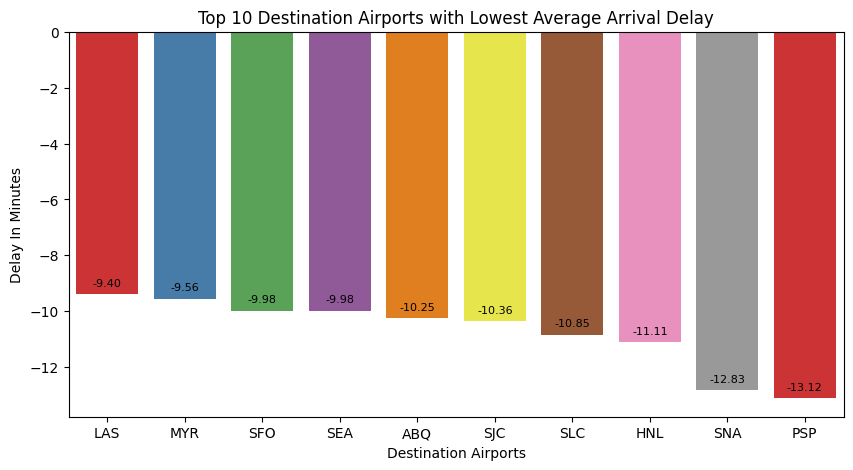

In [ ]:
top_ten_dest_arr = dest_arr_delay[dest_arr_delay['avg_dest_arrival_delay']<0].tail(10)
top_ten_dest_arr
# Visulaize the Average arrival Delay at Airports
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='dest', y='avg_dest_arrival_delay', data =top_ten_dest_arr, palette='Set1')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Top 10 Destination Airports with Lowest Average Arrival Delay')
plt.xlabel('Destination Airports')
plt.ylabel('Delay In Minutes')
plt.show()

In [ ]:
# Percentage of flights arriving late at destination airports
destination_percent_arr_late = history_df.groupby('dest')['lateflight'].mean().reset_index(name ='Dest_Arrival_delay_Percent')
destination_percent_arr_late['Dest_Arrival_delay_Percent'] = round(destination_percent_arr_late['Dest_Arrival_delay_Percent']*100,2)
destination_percent_arr_late =destination_percent_arr_late.sort_values(by='Dest_Arrival_delay_Percent',ascending=False)
destination_percent_arr_late

,dest,Dest_Arrival_delay_Percent
17,CAE,52.94
16,BZN,50.00
44,JAC,44.44
33,EYW,42.86
38,HDN,41.67
...,...,...
8,BHM,18.92
60,MVY,18.52
61,MYR,18.18
19,CHO,16.67


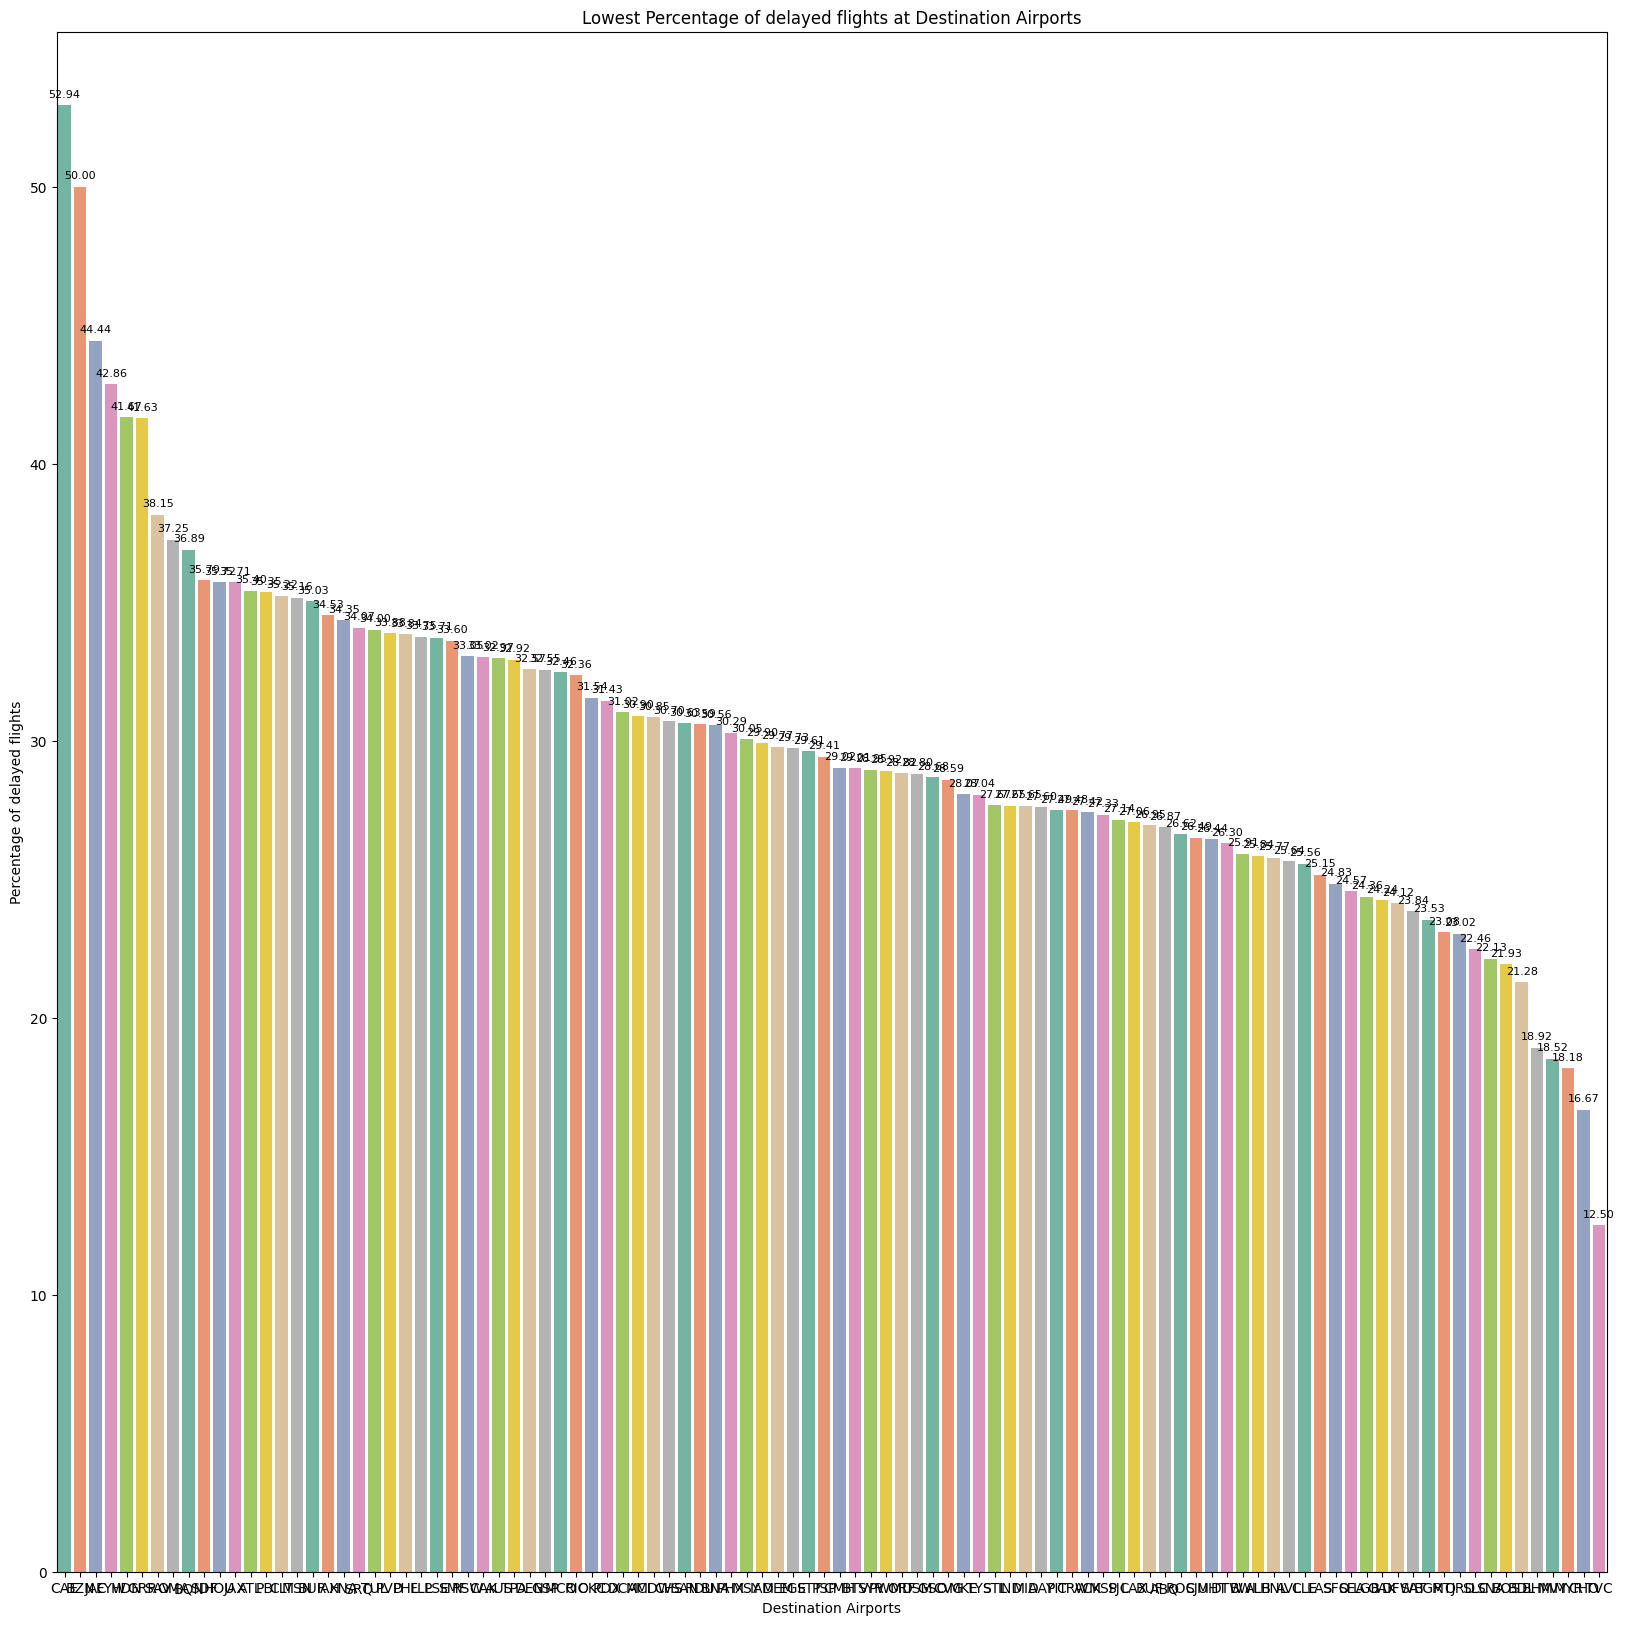

In [ ]:
# Visulaize the Percentage of delayed flights at Destination Airports
plt.figure(figsize=(20, 20))
plots = sns.barplot(x='dest', y='Dest_Arrival_delay_Percent', data =destination_percent_arr_late, palette='Set2')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Lowest Percentage of delayed flights at Destination Airports')
plt.xlabel('Destination Airports')
plt.ylabel('Percentage of delayed flights')
plt.show()

**SEASONALITY EDA - HOUR, DAY, MONTH**

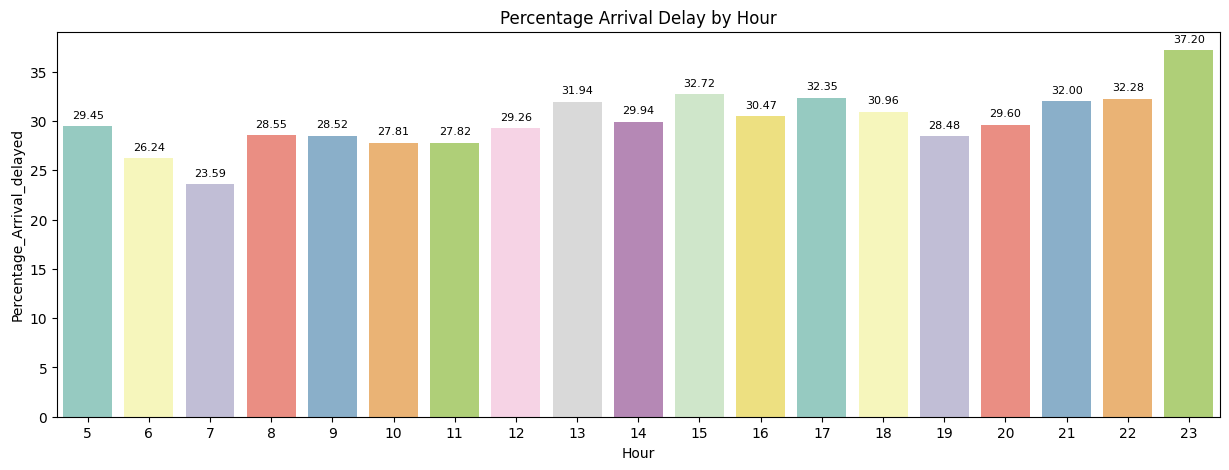

In [ ]:
# PERCENTAGE OF ARRIVAL DELAY BY HOUR
arr_delay_hour = history_df.groupby(['hour'])['lateflight'].mean().reset_index(name='Hour_Arr_delay_Perc')
arr_delay_hour['Hour_Arr_delay_Perc'] = round(arr_delay_hour['Hour_Arr_delay_Perc']*100,2)
arr_delay_hour =arr_delay_hour.sort_values(by=['Hour_Arr_delay_Perc'],ascending=[False])
arr_delay_hour

# Visulaize
plt.figure(figsize=(15,5))
plots = sns.barplot(x='hour', y='Hour_Arr_delay_Perc',  data = arr_delay_hour,palette='Set3')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')

plt.title('Percentage Arrival Delay by Hour')
plt.xlabel('Hour')
plt.ylabel('Percentage_Arrival_delayed')
plt.show()


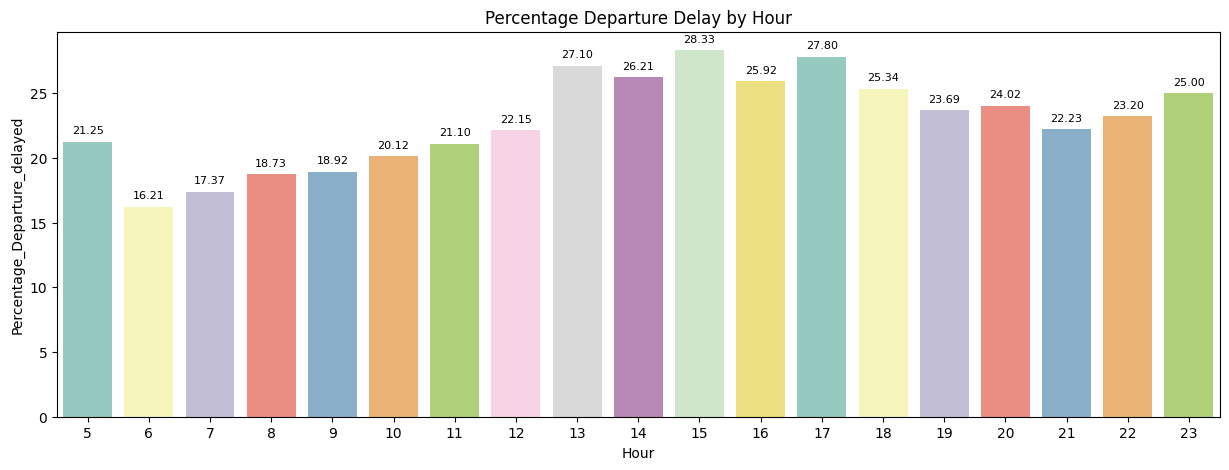

In [ ]:
# PERCENTAGE OF DEPARTURE  DELAY BY HOUR
dep_delay_hour = history_df.groupby(['hour'])['Departure_Delay'].mean().reset_index(name='Hour_Dep_delay_Perc')
dep_delay_hour['Hour_Dep_delay_Perc'] = round(dep_delay_hour['Hour_Dep_delay_Perc']*100,2)
dep_delay_hour =dep_delay_hour.sort_values(by=['Hour_Dep_delay_Perc'],ascending=[False])
dep_delay_hour

# Visulaize
plt.figure(figsize=(15,5))
plots = sns.barplot(x='hour', y='Hour_Dep_delay_Perc',  data = dep_delay_hour,palette='Set3')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')

plt.title('Percentage Departure Delay by Hour')
plt.xlabel('Hour')
plt.ylabel('Percentage_Departure_delayed')
plt.show()

In [ ]:
# Combine the Hour data
hour_info = pd.merge(arr_delay_hour,dep_delay_hour,how='left',on='hour')
hour_info

,hour,Hour_Arr_delay_Perc,Hour_Dep_delay_Perc
0,23,37.20,25.00
1,15,32.72,28.33
2,17,32.35,27.80
3,22,32.28,23.20
4,21,32.00,22.23
5,13,31.94,27.10
6,18,30.96,25.34
7,16,30.47,25.92
8,14,29.94,26.21
9,20,29.60,24.02


In [ ]:
origin_dest_distance = history_df.groupby(['origin','dest'])['distance'].mean().reset_index(name='origin_dest_distance')
origin_dest_distance

,origin,dest,origin_dest_distance
0,EWR,ALB,143.0
1,EWR,ATL,746.0
2,EWR,AUS,1504.0
3,EWR,AVL,583.0
4,EWR,BDL,116.0
...,...,...,...
208,LGA,SYR,198.0
209,LGA,TPA,1010.0
210,LGA,TVC,655.0
211,LGA,TYS,647.0


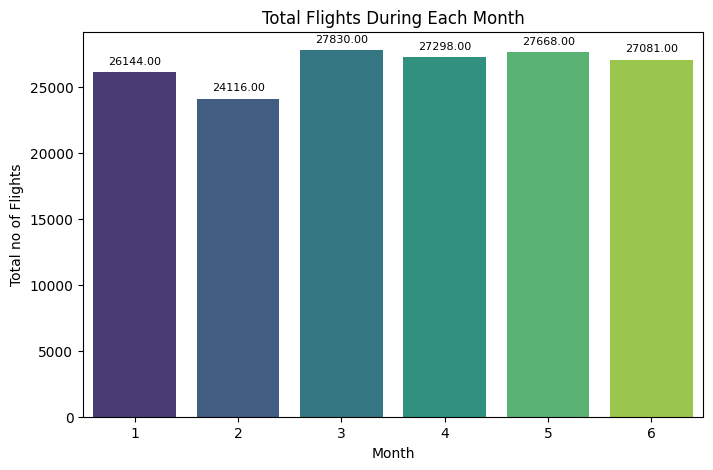

In [ ]:
# Number of Flights Month Wise
num_flights_month = history_df.groupby('month').size().reset_index(name='total_month_flights')
num_flights_month = num_flights_month.sort_values(by='total_month_flights', ascending=False)
# Visulaize the Number of flights during each season
plt.figure(figsize=(8, 5))
plots = sns.barplot(x='month', y='total_month_flights', data =num_flights_month, palette='viridis')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Total Flights During Each Month')
plt.xlabel('Month')
plt.ylabel('Total no of Flights')
plt.show()

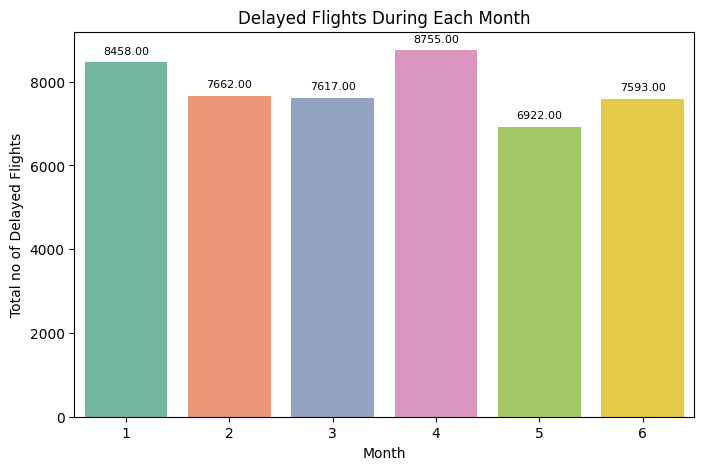

In [ ]:
# Number of Delayed Flights Month Wise
Delayed_flights_month = history_df.groupby('month')['lateflight'].sum().reset_index(name='Dealyed_monthly_flights')
Delayed_flights_month = Delayed_flights_month.sort_values(by='Dealyed_monthly_flights', ascending=False)
# Visulaize the Number of flights during each season
plt.figure(figsize=(8, 5))
plots = sns.barplot(x='month', y='Dealyed_monthly_flights', data =Delayed_flights_month, palette='Set2')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Delayed Flights During Each Month')
plt.xlabel('Month')
plt.ylabel('Total no of Delayed Flights')
plt.show()

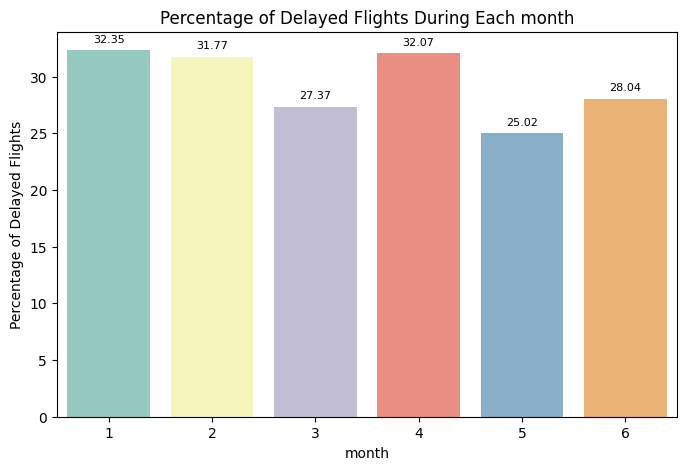

In [ ]:
# Percentage Delayed Flights Month Wise
Percentage_Delayed_flights_month = history_df.groupby('month')['lateflight'].mean().reset_index(name='Dealyed_month_flights%')
Percentage_Delayed_flights_month['Dealyed_month_flights%'] = round(Percentage_Delayed_flights_month['Dealyed_month_flights%']*100,2)
Percentage_Delayed_flights_month = Percentage_Delayed_flights_month.sort_values(by='Dealyed_month_flights%', ascending=False)
# Visulaize the Number of flights during each season
plt.figure(figsize=(8, 5))
plots = sns.barplot(x='month', y='Dealyed_month_flights%', data =Percentage_Delayed_flights_month, palette='Set3')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Percentage of Delayed Flights During Each month')
plt.xlabel('month')
plt.ylabel('Percentage of Delayed Flights')
plt.show()

In [ ]:
# DAY WISE DELAY PERCENTAGE
history_df.groupby('day')['lateflight'].mean().reset_index(name='Day_wise_delay')

,day,Day_wise_delay
0,1,0.300632
1,2,0.276440
2,3,0.323273
3,4,0.284621
4,5,0.283794
5,6,0.259238
6,7,0.265867
7,8,0.258885
8,9,0.255098
9,10,0.259560


# INDIVIDUAL FLIGHT CHARACTERISTICS

In [ ]:
# FLIGHT TAILNUM DELAY RATES
tailnum_delay_rate = history_df.groupby('tailnum')['lateflight'].mean().reset_index(name='tail_delay_percent')
tailnum_delay_rate['tail_delay_percent'] = round(tailnum_delay_rate['tail_delay_percent']*100,2)
tailnum_delay_rate = tailnum_delay_rate.sort_values(by='tail_delay_percent',ascending=False)
tailnum_delay_rate

,tailnum,tail_delay_percent
1785,N519AS,100.0
2544,N663UA,100.0
2269,N606SW,100.0
2395,N634SW,100.0
2813,N73860,100.0
...,...,...
2366,N628SW,0.0
2378,N631AW,0.0
3582,N929LR,0.0
3581,N929DN,0.0


In [ ]:
# FLIGHT TAILNUM Arrival Delay Rate
tailnum_arr_delay_rate = history_df.groupby('tailnum')['arr_delay'].mean().reset_index(name='tail_arr_delay')
tailnum_arr_delay_rate = tailnum_arr_delay_rate.sort_values(by='tail_arr_delay',ascending=False)
tailnum_arr_delay_rate

,tailnum,tail_arr_delay
2343,N624AW,53.0
2467,N648UA,53.0
1824,N524SW,52.0
3523,N919FJ,49.0
3587,N930LR,46.0
...,...,...
317,N172DZ,-31.0
1935,N546AS,-31.3
362,N182DN,-34.0
3497,N915DN,-39.0


In [ ]:
# Combine Tailnum Info
tailnum_info = pd.merge(tailnum_delay_rate,tailnum_arr_delay_rate,how='left', on=['tailnum'])
tailnum_info

,tailnum,tail_delay_percent,tail_arr_delay
0,N519AS,100.0,15.5
1,N663UA,100.0,23.0
2,N606SW,100.0,3.0
3,N634SW,100.0,7.0
4,N73860,100.0,20.0
...,...,...,...
3813,N628SW,0.0,-7.0
3814,N631AW,0.0,-8.0
3815,N929LR,0.0,-10.5
3816,N929DN,0.0,-8.0


# Features That I will append in the Flight history dataset
# 1. Carrier-Based Features:

**a) PERCENTAGE OF DELAYED FLIGHTS BY CARRIER:** Captures the overall delay tendencies of different carriers.

**b) AVERAGE ARRIVAL DELAY BY CARRIER:** Reflects the average duration of delays for each carrier's arrivals.

**c) AVERAGE DEP DELAY BY CARRIER:** Indicates average departure delay patterns by carrier.

**d) NO OF DESTINATIONS BY CARRIER:** Captures the scope of a carrier's network, potentially influencing delays due to operational complexity.

# 2. Airport-Based Features:

**a) PERCENTAGE OF DELAYED FLIGHTS BY ORIGIN:** Identifies airports with historically higher delay rates.

**b) Average departure delay at origin airports:** Provides insights into delays at departure airports.

# 3. Time-Based Features:

**a)  Hourly Arrival Delay:** Captures hourly delay patterns within different seasons.

**b)  Hourly Departure Delay:** Similarly, tracks hourly departure delays by season.

# 4. Route-Specific Features:

**a) Grouped Mean :** Route specific Carrier Arrival Delay: Average delays for specific carrier-route combinations.groupby(Carrier, dest)

**b) Grouped Mean :** Route specific Carrier Departure Delay: Similar for departure delays.(Carrier, dest)

# 5. Origin - Destination Info

**a) Distance Between Origin and Destination Airports :** Measures the distance metrics between airports

**b) Origin - Destination Flights Delay Percentage**

**c) Origin Destination Avg Arrival Delay**

# 6. Tail Num INFO

**a) Tailnum Avg ariival delay**

**b) Tailnum Percentage of flights delayed**







## Appending all the new features into the history_df dataframe

In [ ]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160137 entries, 0 to 166157
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   month            160137 non-null  int64  
 1   day              160137 non-null  int64  
 2   dep_time         160137 non-null  float64
 3   sched_dep_time   160137 non-null  int64  
 4   dep_delay        160137 non-null  int64  
 5   arr_time         160137 non-null  float64
 6   sched_arr_time   160137 non-null  int64  
 7   arr_delay        160137 non-null  int64  
 8   carrier          160137 non-null  object 
 9   flight           160137 non-null  object 
 10  tailnum          160137 non-null  object 
 11  origin           160137 non-null  object 
 12  dest             160137 non-null  object 
 13  air_time         160137 non-null  float64
 14  distance         160137 non-null  float64
 15  hour             160137 non-null  int64  
 16  minute           160137 non-null  int6

In [ ]:
# Combine Carrier info with history_df
history_df = pd.merge(history_df,carrier_info,how='left',on='carrier')
history_df = pd.merge(history_df,origin_info,how='left',on='origin')
history_df = pd.merge(history_df,hour_info, how='left',on=['hour'])
history_df = pd.merge(history_df,tailnum_info, how='left',on=['tailnum'])
history_df = pd.merge(history_df,destination_percent_arr_late, how='left',on=['dest'])
history_df = pd.merge(history_df,carrier_dest_arr_delay, how='left',on=['carrier','dest'])
history_df = pd.merge(history_df,carrier_Day_arr_delay, how='left',on=['carrier','day_of_week'])
history_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160137 entries, 0 to 160136
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   month                               160137 non-null  int64  
 1   day                                 160137 non-null  int64  
 2   dep_time                            160137 non-null  float64
 3   sched_dep_time                      160137 non-null  int64  
 4   dep_delay                           160137 non-null  int64  
 5   arr_time                            160137 non-null  float64
 6   sched_arr_time                      160137 non-null  int64  
 7   arr_delay                           160137 non-null  int64  
 8   carrier                             160137 non-null  object 
 9   flight                              160137 non-null  object 
 10  tailnum                             160137 non-null  object 
 11  origin                    

In [ ]:
history_df.head()

,month,day,dep_time,sched_dep_time,dep_delay_x,arr_time,sched_arr_time,arr_delay,carrier,flight,...,arrival_delay,dep_delay_y,Origin_Percentage_Delayed,Hour_Arr_delay_Perc,Hour_Dep_delay_Perc,tail_delay_percent,tail_arr_delay,Dest_Arrival_delay_Percent,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay
0,1,1,517.0,515,2,830.0,819,11,UA,1545.0,...,-5.68,0.76,26.34,29.45,21.25,22.54,-7.943662,34.53,34.06,29.67
1,1,1,533.0,529,4,850.0,830,20,UA,1714.0,...,-5.68,0.76,18.45,29.45,21.25,49.35,0.974026,34.53,34.06,29.67
2,1,1,542.0,540,2,923.0,850,33,AA,1141.0,...,-8.64,-1.60,22.84,29.45,21.25,37.50,1.625000,27.65,26.03,25.40
3,1,1,544.0,545,-1,1004.0,1022,-18,B6,725.0,...,-2.51,-0.42,22.84,29.45,21.25,26.21,-6.310680,36.89,36.58,30.78
4,1,1,554.0,600,-6,812.0,837,-25,DL,461.0,...,-7.76,-0.94,18.45,26.24,16.21,36.36,-3.484848,35.40,31.21,25.61


## **Categorical Encoding**
In the history_df dataframe we have 5 Object type or string type columns

In [ ]:
# Fields with Object or string data type
object_type_cols = [col for col in history_df.columns if history_df[col].dtype == 'O']
object_type_cols

['carrier', 'flight', 'tailnum', 'origin', 'dest']

In [ ]:
# Change name of column Percentage_Delayed to Origin_Percentage_Delayed
history_df.rename(columns={'Percentage_Delayed': 'Origin_Percentage_Delayed'}, inplace=True)


In [ ]:
# No of Unique features in each Object Fields
print('The number of unique features in carrier are',history_df['carrier'].nunique())
print('The number of unique features in flight are',history_df['flight'].nunique())
print('The number of unique features in tailnum are',history_df['tailnum'].nunique())
print('The number of unique features in origin are',history_df['origin'].nunique())
print('The number of unique features in dest are',history_df['dest'].nunique())

The number of unique features in carrier are 16
The number of unique features in flight are 2986
The number of unique features in tailnum are 3818
The number of unique features in origin are 3
The number of unique features in dest are 100


### We are going to use Target encoding for flight, tailnum and destination.I am using Target encoding in order to avoid the increase in dimensionality of the dataset caused due to one hot encoding or dummy encoding.

### For columns like carrier, origin and season I will use one hot encoding or dummy encoding since the number of unique features.

In [ ]:
!pip install category_encoders

In [ ]:
# TARGET ENCODING FOR FLIGHT COLUMN
import category_encoders as ce

# Create a target encoder instance
target_encoder = ce.TargetEncoder(cols=['flight'],smoothing=1.0)

# Fit and transform the data using the target encoder
history_df_encoded = target_encoder.fit_transform(history_df['flight'], history_df['lateflight'])

# Rename the target-encoded column with a suffix
suffix = '_encoded'
history_df_encoded.rename(columns={'flight': f'flight{suffix}'}, inplace=True)

# Merge the encoded values back to the original DataFrame
history_df = pd.concat([history_df, history_df_encoded], axis=1)

# Display the DataFrame with the target-encoded values
history_df.head(1)


,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,...,Carrier_Deaprted_late_perc,Origin_Percentage_Delayed,Hour_Arr_delay_Perc,Hour_Dep_delay_Perc,tail_delay_percent,tail_arr_delay,Dest_Arrival_delay_Percent,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded
0,1,1,517.0,515,2,830.0,819,11,UA,1545.0,...,33.05,26.34,29.45,21.25,22.54,-7.943662,34.53,34.06,29.67,0.272727


In [ ]:
# TARGET ENCODING FOR tailnum COLUMN
import category_encoders as ce

# Create a target encoder instance
target_encoder = ce.TargetEncoder(cols=['tailnum'],smoothing=1.0)

# Fit and transform the data using the target encoder
history_df_encoded = target_encoder.fit_transform(history_df['tailnum'], history_df['lateflight'])

# Rename the target-encoded column with a suffix
suffix = '_encoded'
history_df_encoded.rename(columns={'tailnum': f'tailnum{suffix}'}, inplace=True)

# Merge the encoded values back to the original DataFrame
history_df = pd.concat([history_df, history_df_encoded], axis=1)

# Display the DataFrame with the target-encoded values
history_df.head(2)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,...,Origin_Percentage_Delayed,Hour_Arr_delay_Perc,Hour_Dep_delay_Perc,tail_delay_percent,tail_arr_delay,Dest_Arrival_delay_Percent,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded,tailnum_encoded
0,1,1,517.0,515,2,830.0,819,11,UA,1545.0,...,26.34,29.45,21.25,22.54,-7.943662,34.53,34.06,29.67,0.272727,0.225352
1,1,1,533.0,529,4,850.0,830,20,UA,1714.0,...,18.45,29.45,21.25,49.35,0.974026,34.53,34.06,29.67,0.312500,0.493506


In [ ]:
# TARGET ENCODING FOR Destination COLUMN
import category_encoders as ce

# Create a target encoder instance
target_encoder = ce.TargetEncoder(cols=['dest'],smoothing=1.0)

# Fit and transform the data using the target encoder
history_df_encoded = target_encoder.fit_transform(history_df['dest'], history_df['lateflight'])

# Rename the target-encoded column with a suffix
suffix = '_encoded'
history_df_encoded.rename(columns={'dest': f'dest{suffix}'}, inplace=True)

# Merge the encoded values back to the original DataFrame
history_df = pd.concat([history_df, history_df_encoded], axis=1)

# Display the DataFrame with the target-encoded values
history_df.head(2)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,...,Hour_Arr_delay_Perc,Hour_Dep_delay_Perc,tail_delay_percent,tail_arr_delay,Dest_Arrival_delay_Percent,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded,tailnum_encoded,dest_encoded
0,1,1,517.0,515,2,830.0,819,11,UA,1545.0,...,29.45,21.25,22.54,-7.943662,34.53,34.06,29.67,0.272727,0.225352,0.345259
1,1,1,533.0,529,4,850.0,830,20,UA,1714.0,...,29.45,21.25,49.35,0.974026,34.53,34.06,29.67,0.312500,0.493506,0.345259


In [ ]:
# DUMMY ENCODING FOR ORIGIN COLUMN
history_df = pd.get_dummies(history_df, columns=['origin'], prefix='origin', drop_first=True)
history_df.head(2)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,...,tail_delay_percent,tail_arr_delay,Dest_Arrival_delay_Percent,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded,tailnum_encoded,dest_encoded,origin_JFK,origin_LGA
0,1,1,517.0,515,2,830.0,819,11,UA,1545.0,...,22.54,-7.943662,34.53,34.06,29.67,0.272727,0.225352,0.345259,0,0
1,1,1,533.0,529,4,850.0,830,20,UA,1714.0,...,49.35,0.974026,34.53,34.06,29.67,0.312500,0.493506,0.345259,0,1


In [ ]:
# Target ENCODING FOR CARRIER COLUMN
import category_encoders as ce

# Create a target encoder instance
target_encoder = ce.TargetEncoder(cols=['carrier'],smoothing=1.0)

# Fit and transform the data using the target encoder
history_df_encoded = target_encoder.fit_transform(history_df['carrier'], history_df['lateflight'])

# Rename the target-encoded column with a suffix
suffix = '_encoded'
history_df_encoded.rename(columns={'carrier': f'carrier{suffix}'}, inplace=True)

# Merge the encoded values back to the original DataFrame
history_df = pd.concat([history_df, history_df_encoded], axis=1)

# Display the DataFrame with the target-encoded values
history_df.head(2)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,...,tail_arr_delay,Dest_Arrival_delay_Percent,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded,tailnum_encoded,dest_encoded,origin_JFK,origin_LGA,carrier_encoded
0,1,1,517.0,515,2,830.0,819,11,UA,1545.0,...,-7.943662,34.53,34.06,29.67,0.272727,0.225352,0.345259,0,0,0.293856
1,1,1,533.0,529,4,850.0,830,20,UA,1714.0,...,0.974026,34.53,34.06,29.67,0.312500,0.493506,0.345259,0,1,0.293856


In [ ]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160137 entries, 0 to 160136
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   month                               160137 non-null  int64  
 1   day                                 160137 non-null  int64  
 2   dep_time                            160137 non-null  float64
 3   sched_dep_time                      160137 non-null  int64  
 4   dep_delay                           160137 non-null  int64  
 5   arr_time                            160137 non-null  float64
 6   sched_arr_time                      160137 non-null  int64  
 7   arr_delay                           160137 non-null  int64  
 8   carrier                             160137 non-null  object 
 9   flight                              160137 non-null  object 
 10  tailnum                             160137 non-null  object 
 11  dest                      

In [ ]:
history_df.drop(['dep_time','dep_delay','arr_time','arr_delay','distance','flight','tailnum','dest','carrier','hour','minute','Departure_Delay','air_time'], axis=1, inplace =True)

In [ ]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160137 entries, 0 to 160136
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   month                               160137 non-null  int64  
 1   day                                 160137 non-null  int64  
 2   sched_dep_time                      160137 non-null  int64  
 3   sched_arr_time                      160137 non-null  int64  
 4   day_of_week                         160137 non-null  int64  
 5   lateflight                          160137 non-null  int64  
 6   duration                            160137 non-null  int64  
 7   Carrier_Arrival_Delayed_Percentage  160137 non-null  float64
 8   Carrier_Deaprted_late_perc          160137 non-null  float64
 9   Origin_Percentage_Delayed           160137 non-null  float64
 10  Hour_Arr_delay_Perc                 160137 non-null  float64
 11  Hour_Dep_delay_Perc       

In [ ]:
history_df.describe()

,month,day,sched_dep_time,sched_arr_time,day_of_week,lateflight,duration,Carrier_Arrival_Delayed_Percentage,Carrier_Deaprted_late_perc,Origin_Percentage_Delayed,...,tail_arr_delay,Dest_Arrival_delay_Percent,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded,tailnum_encoded,dest_encoded,origin_JFK,origin_LGA,carrier_encoded
count,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,...,160137.000000,160137.000000,160137.000000,160137.000000,1.601370e+05,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000
mean,3.546239,15.631946,1340.458782,1534.052243,2.950711,0.293542,193.593461,29.354913,22.782246,22.782633,...,-4.587079,29.354531,29.353852,29.353734,2.937013e-01,0.292480,0.293520,0.334095,0.302666,0.293548
std,1.699664,8.730730,468.852294,498.030284,1.943544,0.455386,320.809882,3.560607,6.228445,3.206159,...,4.652033,4.267231,6.022272,4.619811,8.468704e-02,0.075908,0.042552,0.471675,0.459413,0.035590
min,1.000000,1.000000,500.000000,1.000000,0.000000,0.000000,-2292.000000,0.000000,0.000000,18.450000,...,-51.000000,12.500000,0.000000,0.000000,6.635010e-07,0.000000,0.166672,0.000000,0.000000,0.187845
25%,2.000000,8.000000,901.000000,1122.000000,1.000000,0.000000,166.000000,26.000000,19.150000,18.450000,...,-7.492754,26.300000,24.770000,25.740000,2.400000e-01,0.250000,0.263030,0.000000,0.000000,0.260006
50%,4.000000,16.000000,1359.000000,1555.000000,3.000000,0.000000,225.000000,29.390000,21.370000,22.840000,...,-4.111111,29.020000,29.640000,29.960000,2.935336e-01,0.293700,0.290223,0.000000,0.000000,0.293856
75%,5.000000,23.000000,1729.000000,1945.000000,5.000000,1.000000,304.000000,32.050000,23.920000,26.340000,...,-1.333333,32.920000,33.330000,32.760000,3.454545e-01,0.341667,0.329182,1.000000,1.000000,0.320500
max,6.000000,31.000000,2359.000000,2359.000000,6.000000,1.000000,640.000000,43.340000,33.730000,26.340000,...,53.000000,52.940000,100.000000,54.000000,7.499972e-01,0.597949,0.529412,1.000000,1.000000,0.433437


# Since the mean values of some features are way higher than others we need to standardise the features so as to make sure that the model should not weigh towards the variables with high means.

In [ ]:
# STANDARDISE THE FEATURE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(history_df.drop(['lateflight'],axis=1))
scaled_feature = scaler.transform(history_df.drop(['lateflight'],axis=1))
scaled_feature

array([[0.        , 0.        , 0.00806885, ..., 0.        , 0.        ,
        0.43165518],
       [0.        , 0.        , 0.01559978, ..., 0.        , 1.        ,
        0.43165518],
       [0.        , 0.        , 0.02151694, ..., 1.        , 0.        ,
        0.22571453],
       ...,
       [1.        , 0.96666667, 0.65034965, ..., 0.        , 0.        ,
        0.53399361],
       [1.        , 0.96666667, 0.83862292, ..., 0.        , 1.        ,
        0.53399361],
       [1.        , 0.96666667, 0.76116192, ..., 0.        , 1.        ,
        0.53399361]])

In [ ]:
history_scaled_df = pd.DataFrame(data=scaled_feature, columns=history_df.drop(['lateflight'],axis=1).columns)
history_scaled_df.head()

,month,day,sched_dep_time,sched_arr_time,day_of_week,duration,Carrier_Arrival_Delayed_Percentage,Carrier_Deaprted_late_perc,Origin_Percentage_Delayed,Hour_Arr_delay_Perc,...,tail_arr_delay,Dest_Arrival_delay_Percent,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded,tailnum_encoded,dest_encoded,origin_JFK,origin_LGA,carrier_encoded
0,0.0,0.0,0.008069,0.346904,0.333333,0.885402,0.678126,0.979840,1.000000,0.430566,...,0.414003,0.544758,0.3406,0.549444,0.363637,0.376875,0.492327,0.0,0.0,0.431655
1,0.0,0.0,0.015600,0.351569,0.333333,0.884379,0.678126,0.979840,0.000000,0.430566,...,0.499750,0.544758,0.3406,0.549444,0.416668,0.825332,0.492327,0.0,1.0,0.431655
2,0.0,0.0,0.021517,0.360051,0.333333,0.887449,0.561375,0.567744,0.556401,0.430566,...,0.506010,0.374629,0.2603,0.470370,0.309334,0.490916,0.302683,1.0,0.0,0.225715
3,0.0,0.0,0.024207,0.432994,0.333333,0.944407,0.754499,0.709161,0.556401,0.430566,...,0.429705,0.603116,0.3658,0.570000,0.392158,0.438392,0.557418,1.0,0.0,0.566702
4,0.0,0.0,0.053792,0.354538,0.333333,0.862551,0.599908,0.576638,0.000000,0.194710,...,0.456876,0.566271,0.3121,0.474259,0.277778,0.608139,0.516391,0.0,1.0,0.293825


In [ ]:
history_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160137 entries, 0 to 160136
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   month                               160137 non-null  float64
 1   day                                 160137 non-null  float64
 2   sched_dep_time                      160137 non-null  float64
 3   sched_arr_time                      160137 non-null  float64
 4   day_of_week                         160137 non-null  float64
 5   duration                            160137 non-null  float64
 6   Carrier_Arrival_Delayed_Percentage  160137 non-null  float64
 7   Carrier_Deaprted_late_perc          160137 non-null  float64
 8   Origin_Percentage_Delayed           160137 non-null  float64
 9   Hour_Arr_delay_Perc                 160137 non-null  float64
 10  Hour_Dep_delay_Perc                 160137 non-null  float64
 11  tail_delay_percent        

In [ ]:
history_scaled_df.describe()

,month,day,sched_dep_time,sched_arr_time,day_of_week,duration,Carrier_Arrival_Delayed_Percentage,Carrier_Deaprted_late_perc,Origin_Percentage_Delayed,Hour_Arr_delay_Perc,...,tail_arr_delay,Dest_Arrival_delay_Percent,Carr_Dest_Arrival_delay,Carr_Day_Arrival_delay,flight_encoded,tailnum_encoded,dest_encoded,origin_JFK,origin_LGA,carrier_encoded
count,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,...,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000,160137.000000
mean,0.509248,0.487732,0.452103,0.650149,0.491785,0.847747,0.677317,0.675430,0.549130,0.423478,...,0.446278,0.416779,0.293539,0.543588,0.391603,0.489138,0.349694,0.334095,0.302666,0.430401
std,0.339933,0.291024,0.252207,0.211209,0.323924,0.109417,0.082155,0.184656,0.406357,0.180026,...,0.044731,0.105520,0.060223,0.085552,0.112917,0.126947,0.117308,0.471675,0.459413,0.144917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.233333,0.215707,0.475403,0.166667,0.838336,0.599908,0.567744,0.000000,0.359295,...,0.418339,0.341246,0.247700,0.476667,0.320001,0.418096,0.265639,0.000000,0.000000,0.293825
50%,0.600000,0.500000,0.462076,0.659033,0.500000,0.858458,0.678126,0.633561,0.556401,0.416605,...,0.450855,0.408506,0.296400,0.554815,0.391379,0.491179,0.340604,0.000000,0.000000,0.431655
75%,0.800000,0.733333,0.661108,0.824427,0.833333,0.885402,0.739502,0.709161,1.000000,0.541514,...,0.477564,0.504946,0.333300,0.606667,0.460607,0.571398,0.448006,1.000000,1.000000,0.540143
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# concat the target variable with scaled feautures
history_target_df = pd.DataFrame(data= history_df['lateflight'])

In [ ]:
history_final_df = pd.concat([history_scaled_df,history_target_df],axis=1)
history_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160137 entries, 0 to 160136
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   month                               160137 non-null  float64
 1   day                                 160137 non-null  float64
 2   sched_dep_time                      160137 non-null  float64
 3   sched_arr_time                      160137 non-null  float64
 4   day_of_week                         160137 non-null  float64
 5   duration                            160137 non-null  float64
 6   Carrier_Arrival_Delayed_Percentage  160137 non-null  float64
 7   Carrier_Deaprted_late_perc          160137 non-null  float64
 8   Origin_Percentage_Delayed           160137 non-null  float64
 9   Hour_Arr_delay_Perc                 160137 non-null  float64
 10  Hour_Dep_delay_Perc                 160137 non-null  float64
 11  tail_delay_percent        

## **CORRELATION MATRIX**

In [ ]:
correlation = history_final_df.corr()

<Axes: >

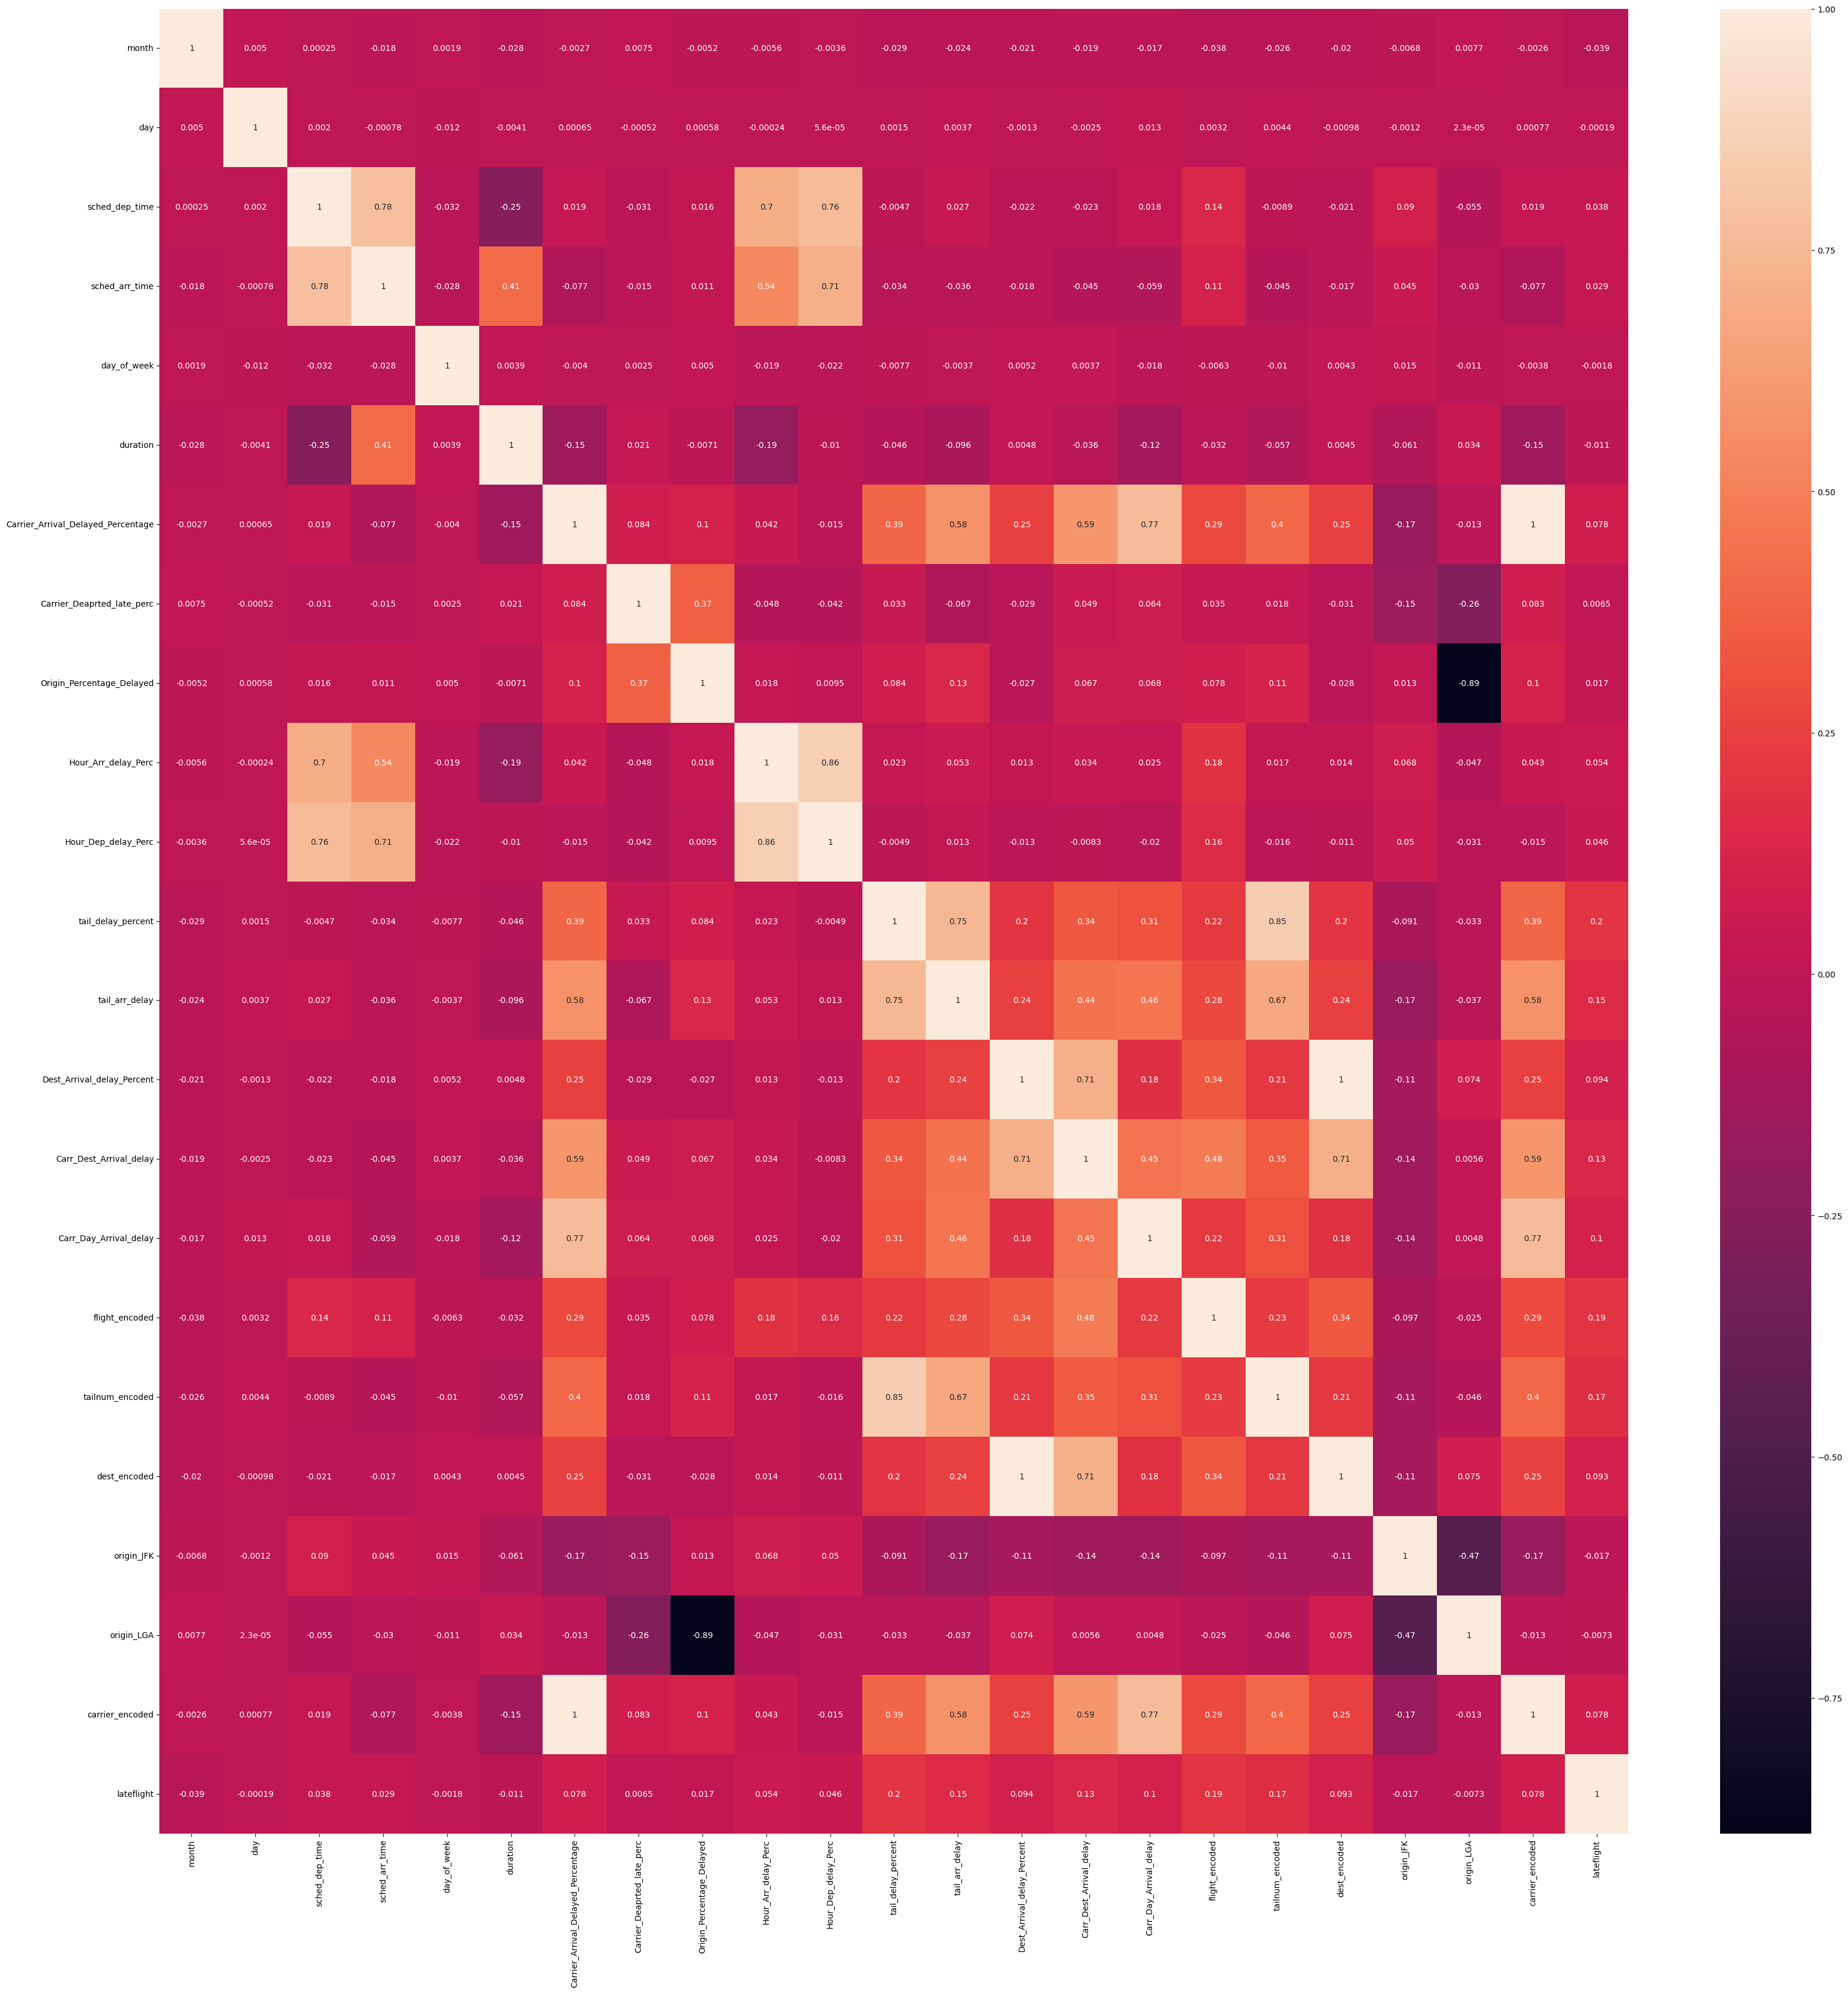

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(correlation, annot =True)

# Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Separate the target variable from the independent variables
X = history_final_df.drop('lateflight', axis=1)
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Display the VIF values
vif_data



/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,month,1.004215
1,day,1.000677
2,sched_dep_time,inf
3,sched_arr_time,inf
4,day_of_week,1.002454
5,duration,inf
6,Carrier_Arrival_Delayed_Percentage,788.729925
7,Carrier_Deaprted_late_perc,1.293027
8,Origin_Percentage_Delayed,inf
9,Hour_Arr_delay_Perc,4.360728


In [ ]:
vif_data

,Variable,VIF
0,month,1.004215
1,day,1.000677
2,sched_dep_time,inf
3,sched_arr_time,inf
4,day_of_week,1.002454
5,duration,inf
6,Carrier_Arrival_Delayed_Percentage,788.729925
7,Carrier_Deaprted_late_perc,1.293027
8,Origin_Percentage_Delayed,inf
9,Hour_Arr_delay_Perc,4.360728


# **PEARSON CORRELATION VALUES TO SELECT THE BEAST FEATURES FOR MODEL TRAINING**

In [ ]:
correlation_matrix = history_final_df.corr(method='pearson')
correlation_matrix['lateflight'].sort_values(ascending=False)

lateflight                            1.000000
tail_delay_percent                    0.199733
flight_encoded                        0.188674
tailnum_encoded                       0.169509
tail_arr_delay                        0.148992
Carr_Dest_Arrival_delay               0.132241
Carr_Day_Arrival_delay                0.101452
Dest_Arrival_delay_Percent            0.093716
dest_encoded                          0.093449
Carrier_Arrival_Delayed_Percentage    0.078204
carrier_encoded                       0.078154
Hour_Arr_delay_Perc                   0.053780
Hour_Dep_delay_Perc                   0.046142
sched_dep_time                        0.037864
sched_arr_time                        0.028542
Origin_Percentage_Delayed             0.017141
Carrier_Deaprted_late_perc            0.006532
day                                  -0.000190
day_of_week                          -0.001814
origin_LGA                           -0.007325
duration                             -0.011028
origin_JFK   

## **RECURSIVE FEATURE ELIMINATION WITH CROSS VALIDATION TO SELECT THE OPTIMAL FEATURES FOR MODEL TRAINING**

Optimal numer of features: 12


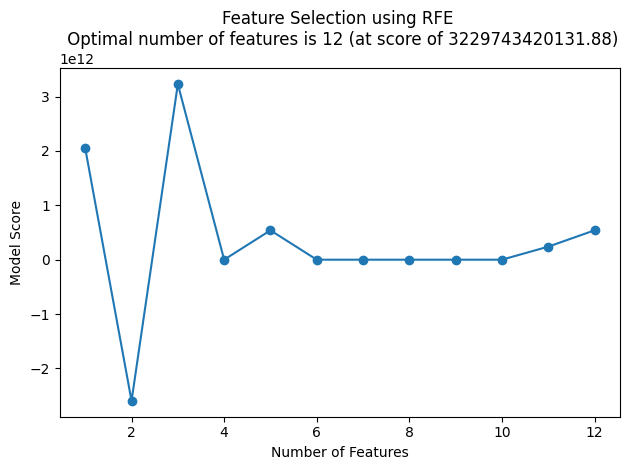

In [ ]:
# RECURSIVE FEATURE ELIMINATION WITH CROSS VALIDATION TO SELECT THE OPTIMAL FEATURES FOR MODEL TRAINING
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = history_final_df.drop(["lateflight"], axis = 1)
y = history_final_df["lateflight"]

regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X,y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.estimator_.coef_) + 1), fit.estimator_.coef_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.estimator_.coef_), 4)})")
plt.tight_layout()
plt.show()

In [ ]:
# The 16 Optimal features based on RECURSIVE FEATURE ELIMINATION
X_new.columns


Index(['sched_dep_time', 'sched_arr_time', 'duration',
       'Carrier_Arrival_Delayed_Percentage', 'Origin_Percentage_Delayed',
       'tail_delay_percent', 'Dest_Arrival_delay_Percent',
       'Carr_Day_Arrival_delay', 'flight_encoded', 'dest_encoded',
       'origin_JFK', 'origin_LGA'],
      dtype='object')

## FEATURE IMPORTANCE USING RANDOM FOREST

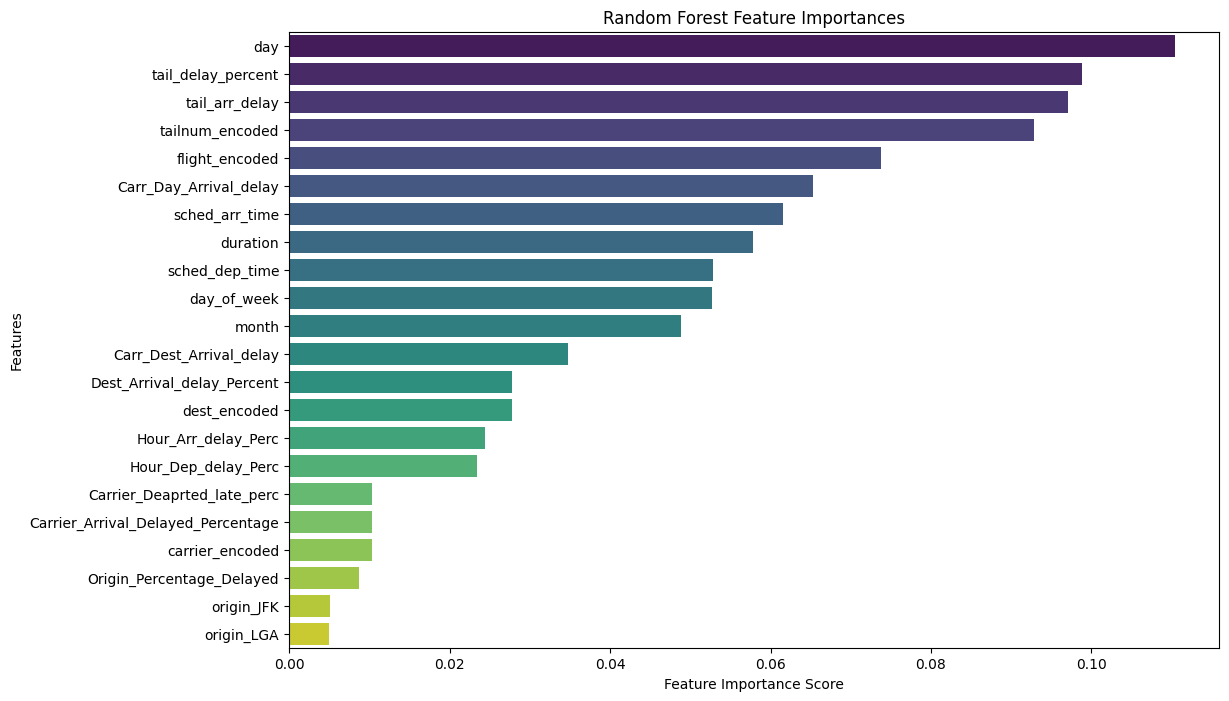

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = history_final_df.drop('lateflight', axis=1)  # Features
y = history_final_df['lateflight']  # Target variable

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# visualize the feature importances
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()



In [ ]:
round(sorted_feature_importances,2)

day                                   0.11
tail_delay_percent                    0.10
tail_arr_delay                        0.10
tailnum_encoded                       0.09
flight_encoded                        0.07
Carr_Day_Arrival_delay                0.07
sched_arr_time                        0.06
duration                              0.06
sched_dep_time                        0.05
day_of_week                           0.05
month                                 0.05
Carr_Dest_Arrival_delay               0.03
Dest_Arrival_delay_Percent            0.03
dest_encoded                          0.03
Hour_Arr_delay_Perc                   0.02
Hour_Dep_delay_Perc                   0.02
Carrier_Deaprted_late_perc            0.01
Carrier_Arrival_Delayed_Percentage    0.01
carrier_encoded                       0.01
Origin_Percentage_Delayed             0.01
origin_JFK                            0.01
origin_LGA                            0.01
dtype: float64

# FISHER'S SCORE FOR FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming history_df is your DataFrame and 'lateflight' is the target variable
# Separate features and target variable
X = history_final_df.drop('lateflight', axis=1)  # Features
y = history_final_df['lateflight']  # Target variable

# Use scikit-learn's SelectKBest with Fisher's score (f_classif)
k_best_selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector on the data
k_best_selector.fit(X, y)

# Get Fisher's scores and corresponding p-values
fisher_scores = k_best_selector.scores_
p_values = k_best_selector.pvalues_

# Combine scores and p-values into a DataFrame for better visibility
fisher_scores_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': fisher_scores, 'P_Value': p_values})

# Sort features by Fisher's score in descending order
fisher_scores_df = fisher_scores_df.sort_values(by='Fisher_Score', ascending=False)

# Display the DataFrame with Fisher's scores
fisher_scores_df


,Feature,Fisher_Score,P_Value
11,tail_delay_percent,6653.761182,0.000000e+00
16,flight_encoded,5910.857282,0.000000e+00
17,tailnum_encoded,4737.319834,0.000000e+00
12,tail_arr_delay,3635.461292,0.000000e+00
14,Carr_Dest_Arrival_delay,2850.215055,0.000000e+00
15,Carr_Day_Arrival_delay,1665.331421,0.000000e+00
13,Dest_Arrival_delay_Percent,1418.875984,3.797907e-309
18,dest_encoded,1410.722875,2.166224e-307
6,Carrier_Arrival_Delayed_Percentage,985.390688,1.221286e-215
21,carrier_encoded,984.129167,2.287466e-215


In [ ]:
high_priority_features = [
    "tail_delay_percent",
    "flight_encoded",
    "tailnum_encoded",
    "tail_arr_delay",
    "Carr_Dest_Arrival_delay",
    "Carr_Day_Arrival_delay"
]



In [ ]:
# Final Feature Data Set
history_train_df = history_final_df[high_priority_features]

In [ ]:
history_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160137 entries, 0 to 160136
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tail_delay_percent       160137 non-null  float64
 1   flight_encoded           160137 non-null  float64
 2   tailnum_encoded          160137 non-null  float64
 3   tail_arr_delay           160137 non-null  float64
 4   Carr_Dest_Arrival_delay  160137 non-null  float64
 5   Carr_Day_Arrival_delay   160137 non-null  float64
dtypes: float64(6)
memory usage: 7.3 MB


# MODEL TRAINING ON IMBALANCED DATA



In [ ]:
X = history_train_df
y = history_final_df['lateflight']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


### ML ALGO

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
dt=DecisionTreeClassifier()
lr=LogisticRegression(max_iter=1000)
sv=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()

In [ ]:
models=[dt,lr,knn,nb]

In [ ]:
for model in models:
    model.fit(X_train,y_train)
    result=model.predict(X_val)
    print(f"{round(accuracy_score(y_val,result)*100,2)} is the accuracy for {model}")

60.53 is the accuracy for DecisionTreeClassifier()
71.11 is the accuracy for LogisticRegression(max_iter=1000)
66.7 is the accuracy for KNeighborsClassifier()
67.44 is the accuracy for GaussianNB()


# Model 1

In [ ]:
# LOGISTIC REGRESSION
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
r=lr.predict(X_val)
print(classification_report(y_val,r))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,r))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83     33859
           1       0.56      0.10      0.16     14183

    accuracy                           0.71     48042
   macro avg       0.64      0.53      0.49     48042
weighted avg       0.67      0.71      0.63     48042

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[32788  1071]
 [12833  1350]]


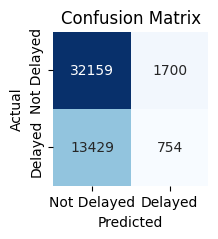

In [ ]:
lr_cm = confusion_matrix(y_val,r)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 2

In [ ]:
# DECISION TREES
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_r=dt.predict(X_val)
print(classification_report(y_val,dt_r))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,dt_r))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     33986
           1       0.33      0.33      0.33     14056

    accuracy                           0.61     48042
   macro avg       0.53      0.53      0.53     48042
weighted avg       0.61      0.61      0.61     48042

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[24548  9438]
 [ 9365  4691]]


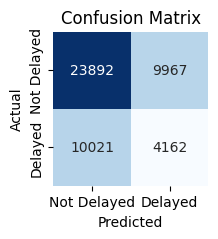

In [ ]:
dt_cm = confusion_matrix(y_val,dt_r)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 3

In [ ]:
# KNN CLASSIFIER
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_result=knn.predict(X_val)
print(classification_report(y_val,knn_result))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,knn_result))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78     33986
           1       0.38      0.24      0.30     14056

    accuracy                           0.66     48042
   macro avg       0.56      0.54      0.54     48042
weighted avg       0.63      0.66      0.64     48042

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[28492  5494]
 [10634  3422]]


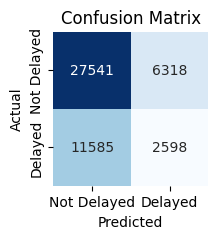

In [ ]:
knn_cm = confusion_matrix(y_val,knn_result)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 4

In [ ]:
# GAUSSIAN NB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_result=nb.predict(X_val)
print(classification_report(y_val,nb_result))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,nb_result))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     33986
           1       0.41      0.41      0.41     14056

    accuracy                           0.66     48042
   macro avg       0.59      0.59      0.59     48042
weighted avg       0.66      0.66      0.66     48042

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[25801  8185]
 [ 8265  5791]]


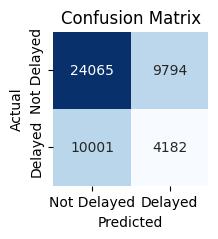

In [ ]:
nb_cm = confusion_matrix(y_val,nb_result)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ENSEMBLE ALGORITHMS

In [ ]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

In [ ]:
md=[]
for i in models:
    md.append((str(i)[:-2],i))
md

[('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('LogisticRegression(max_iter=100', LogisticRegression(max_iter=1000)),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('GaussianNB', GaussianNB())]

In [ ]:
rf=RandomForestClassifier()
vc=VotingClassifier(md)

In [ ]:
for mod in [rf,vc]:
    mod.fit(X_train,y_train)
    res=mod.predict(X_val)
    print(f"{round(accuracy_score(y_val,res)*100,2)} is the accuracy for {mod}")

66.31 is the accuracy for RandomForestClassifier()
70.2 is the accuracy for VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('LogisticRegression(max_iter=100',
                              LogisticRegression(max_iter=1000)),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('GaussianNB', GaussianNB())])


# Model 5

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_res=rfc.predict(X_val)
print(f"{round(accuracy_score(y_val,rfc_res)*100,2)} is the accuracy for {rfc}")
print(classification_report(y_val,rfc_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,rfc_res))

66.31 is the accuracy for RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.72      0.85      0.78     33859
           1       0.38      0.22      0.28     14183

    accuracy                           0.66     48042
   macro avg       0.55      0.53      0.53     48042
weighted avg       0.62      0.66      0.63     48042

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[28747  5112]
 [11073  3110]]


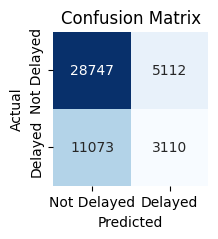

In [ ]:
rfc_cm = confusion_matrix(y_val,rfc_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(rfc_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 6

In [ ]:
vc=VotingClassifier(md)
vc.fit(X_train,y_train)
vc_res=vc.predict(X_val)
print(f"{round(accuracy_score(y_val,vc_res)*100,2)} is the accuracy for {vc}")
print(classification_report(y_val,vc_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,vc_res))

70.2 is the accuracy for VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('LogisticRegression(max_iter=100',
                              LogisticRegression(max_iter=1000)),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('GaussianNB', GaussianNB())])
              precision    recall  f1-score   support

           0       0.72      0.94      0.82     33859
           1       0.48      0.13      0.20     14183

    accuracy                           0.70     48042
   macro avg       0.60      0.53      0.51     48042
weighted avg       0.65      0.70      0.63     48042

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[31945  1914]
 [12401  1782]]


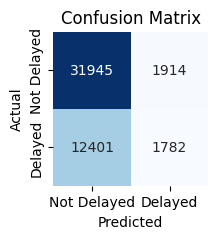

In [ ]:
vc_cm = confusion_matrix(y_val,vc_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(vc_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### BOOSTING ALGORITHM

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
gb=GradientBoostingClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

In [ ]:
for mod in [gb,ada,xgb]:
    mod.fit(X_train,y_train)
    res=mod.predict(X_val)
    print(f"{round(accuracy_score(y_val,res)*100,2)} is the accuracy for {mod}")

71.07 is the accuracy for GradientBoostingClassifier()
71.02 is the accuracy for AdaBoostClassifier()
70.73 is the accuracy for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


# Model 7

In [ ]:
# XGBOOST CLASSIFIER
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_res=xgb.predict(X_val)

print(classification_report(y_val,xgb_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,xgb_res))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82     33859
           1       0.52      0.11      0.18     14183

    accuracy                           0.71     48042
   macro avg       0.62      0.53      0.50     48042
weighted avg       0.66      0.71      0.63     48042

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[32446  1413]
 [12649  1534]]


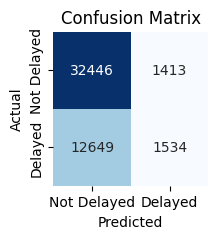

In [ ]:
xgb_cm = confusion_matrix(y_val,xgb_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 8

In [ ]:
# GRADIENT BOOSTING CLASSIFIER
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_res=xgb.predict(X_val)

print(classification_report(y_val,gb_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,gb_res))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82     33859
           1       0.52      0.11      0.18     14183

    accuracy                           0.71     48042
   macro avg       0.62      0.53      0.50     48042
weighted avg       0.66      0.71      0.63     48042

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[32446  1413]
 [12649  1534]]


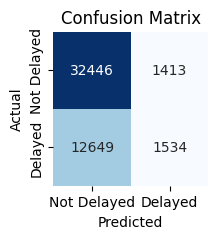

In [ ]:
gb_cm = confusion_matrix(y_val,gb_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 9

In [ ]:
# Ada Boost Classifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_res=xgb.predict(X_val)

print(classification_report(y_val,ada_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,ada_res))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82     33859
           1       0.52      0.11      0.18     14183

    accuracy                           0.71     48042
   macro avg       0.62      0.53      0.50     48042
weighted avg       0.66      0.71      0.63     48042

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[32446  1413]
 [12649  1534]]


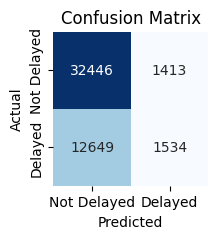

In [ ]:
ada_cm = confusion_matrix(y_val,ada_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(ada_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Handling Class Imbalance Using SMOTE


In [ ]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
target_variable = 'lateflight'
# Separate features and target variable
X = history_df.drop(target_variable,axis=1)
y = history_df[target_variable]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Scale the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)




In [ ]:
# Create a new balanced DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled_scaled, columns=X.columns), pd.Series(y_resampled, name=target_variable)], axis=1)

# Feature Engineering on Balanced Data

In [ ]:
#Correlation Analysis
correlation_matrix = balanced_df.corr()
correlation_with_target = correlation_matrix['lateflight'].sort_values(ascending=False)
correlation_with_target

lateflight                            1.000000
tail_delay_percent                    0.224313
flight_encoded                        0.212733
tailnum_encoded                       0.196413
tail_arr_delay                        0.170296
Carr_Dest_Arrival_delay               0.149949
Carr_Day_Arrival_delay                0.123813
Dest_Arrival_delay_Percent            0.108015
dest_encoded                          0.107657
Carrier_Arrival_Delayed_Percentage    0.087933
carrier_encoded                       0.087875
Hour_Arr_delay_Perc                   0.055501
Hour_Dep_delay_Perc                   0.046165
sched_dep_time                        0.037520
sched_arr_time                        0.028082
Origin_Percentage_Delayed             0.019466
Carrier_Deaprted_late_perc            0.004791
duration                             -0.010945
day                                  -0.020282
origin_LGA                           -0.023414
origin_JFK                           -0.036755
day_of_week  

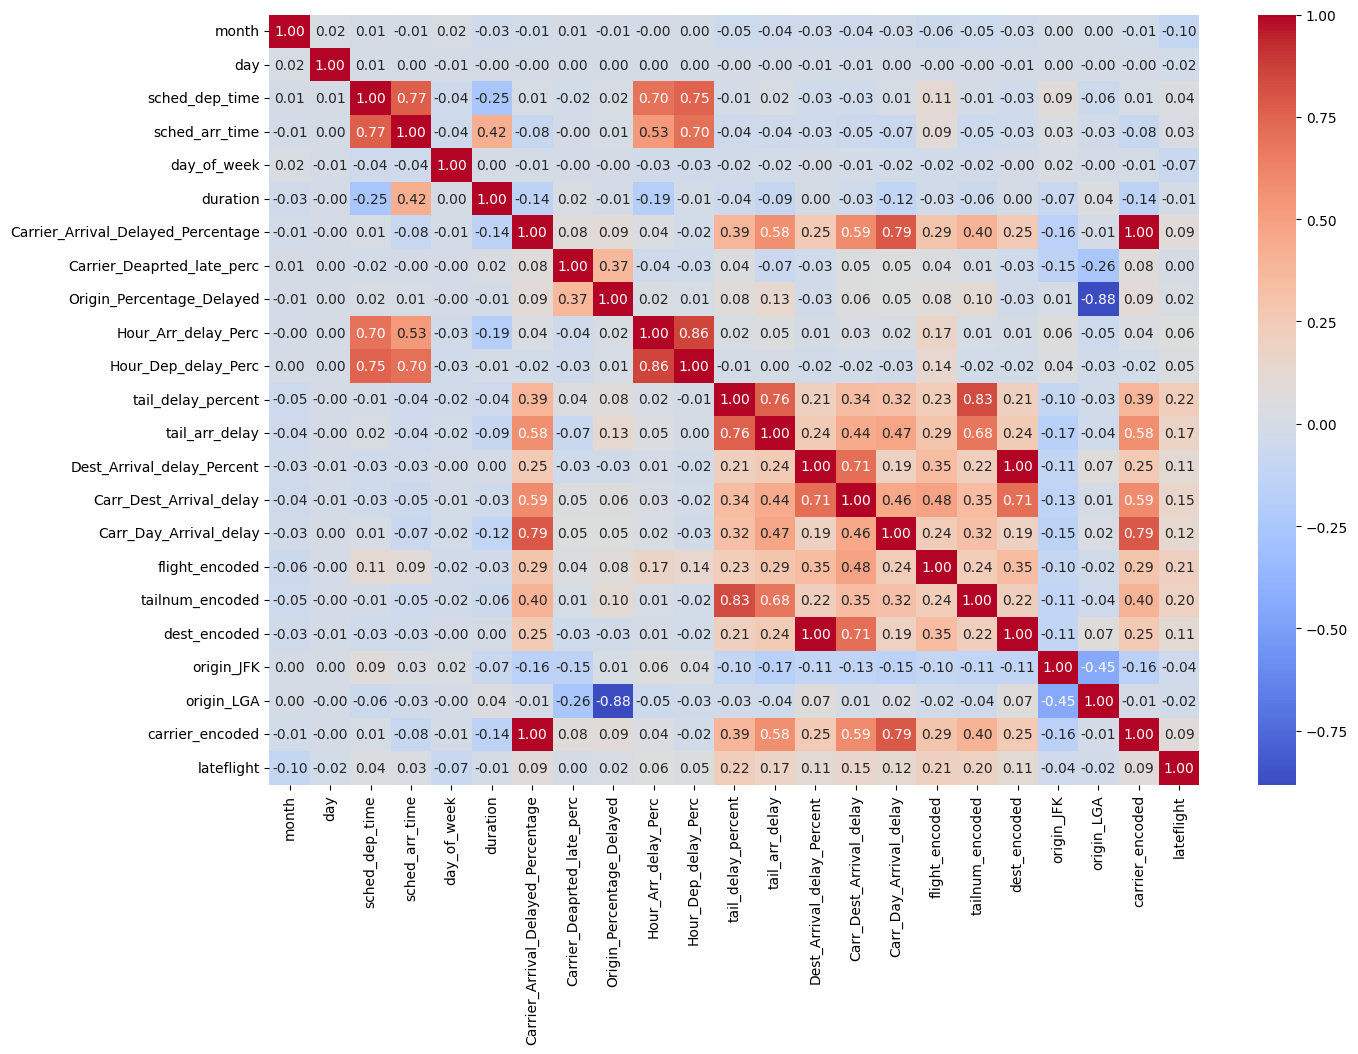

In [ ]:
# You can visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# Recursive Feature Engineering
from sklearn.feature_selection import RFE

X = balanced_df.drop('lateflight', axis=1)
y = balanced_df['lateflight']

# Using RandomForest as an example
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)  # You can choose the desired number of features
X_rfe = rfe.fit_transform(X, y)

In [ ]:
# Identify selected features
selected_features_rfe = X.columns[rfe.support_]
selected_features_rfe

Index(['day', 'sched_dep_time', 'sched_arr_time', 'duration',
       'tail_delay_percent', 'tail_arr_delay', 'Carr_Dest_Arrival_delay',
       'Carr_Day_Arrival_delay', 'flight_encoded', 'tailnum_encoded'],
      dtype='object')

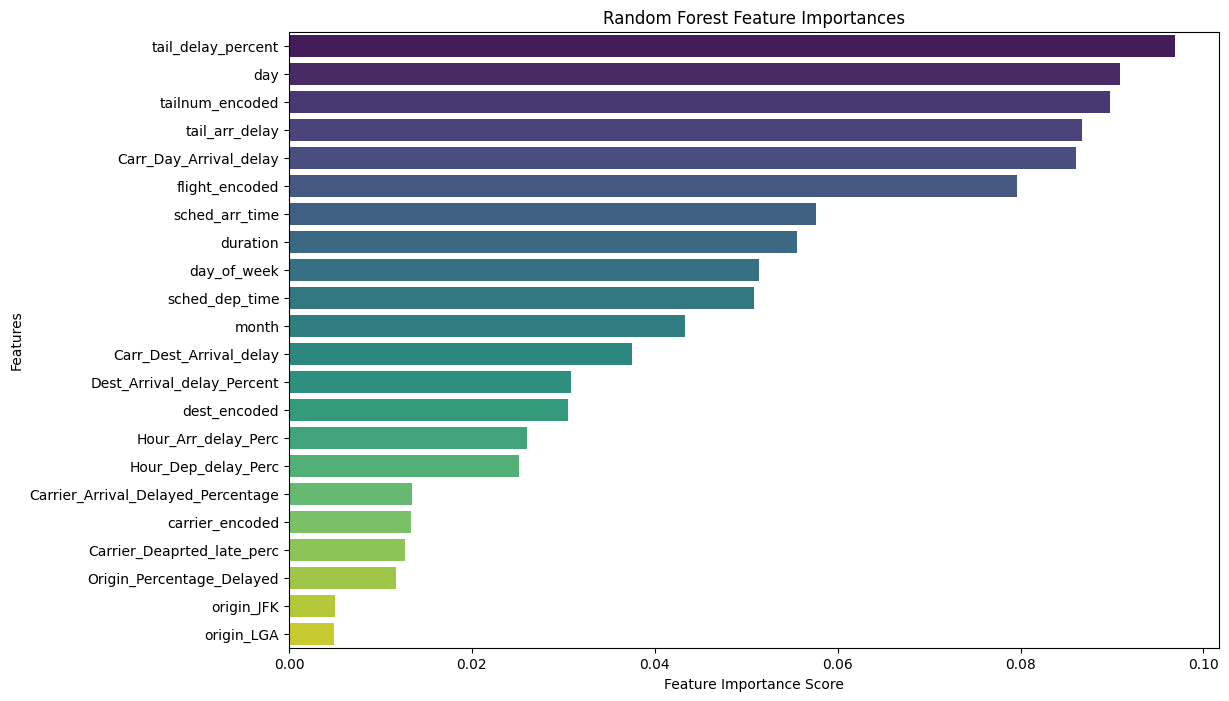

In [ ]:
# RANDOM FOREST FEATURE IMPORTANCE
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = balanced_df.drop('lateflight', axis=1)  # Features
y = balanced_df['lateflight']  # Target variable

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# visualize the feature importances
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
# FEATURES FOR TRAINING ON BALANCED DATA
selected_features = ['day', 'sched_dep_time', 'sched_arr_time', 'duration',
       'tail_delay_percent', 'tail_arr_delay', 'Carr_Dest_Arrival_delay',
       'Carr_Day_Arrival_delay', 'flight_encoded', 'tailnum_encoded']

In [ ]:
# Separate the target variable
X = balanced_df[selected_features]
y = balanced_df['lateflight']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
dt=DecisionTreeClassifier()
lr=LogisticRegression(max_iter=1000)
sv=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()

# Model 10

In [ ]:
# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, lr_pred))
print("Classification Report:")
print(classification_report(y_val, lr_pred))

Accuracy: 0.6100480236424086
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     27139
           1       0.61      0.61      0.61     27001

    accuracy                           0.61     54140
   macro avg       0.61      0.61      0.61     54140
weighted avg       0.61      0.61      0.61     54140



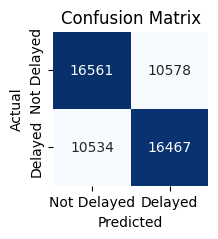

In [ ]:
lrm_cm = confusion_matrix(y_val, lr_pred)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(lrm_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 11

In [ ]:
# DECISION TREES
dt_b=DecisionTreeClassifier()
dt_b.fit(X_train,y_train)
dt_b_res=dt_b.predict(X_val)
print(classification_report(y_val,dt_b_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,dt_b_res))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66     27139
           1       0.66      0.67      0.67     27001

    accuracy                           0.66     54140
   macro avg       0.66      0.66      0.66     54140
weighted avg       0.66      0.66      0.66     54140

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[17723  9416]
 [ 8808 18193]]


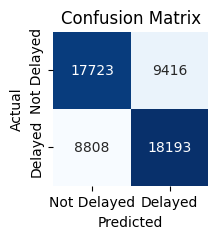

In [ ]:
dtb_cm = confusion_matrix(y_val,dt_b_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(dtb_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 12

In [ ]:
# GAUSSIAN NB
nb_b=GaussianNB()
nb_b.fit(X_train,y_train)
nb_b_result=nb_b.predict(X_val)
print(classification_report(y_val,nb_b_result))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,nb_b_result))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58     27139
           1       0.59      0.68      0.63     27001

    accuracy                           0.61     54140
   macro avg       0.61      0.61      0.60     54140
weighted avg       0.61      0.61      0.60     54140

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[14557 12582]
 [ 8724 18277]]


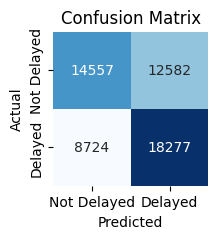

In [ ]:
nbb_cm = confusion_matrix(y_val,nb_b_result)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(nbb_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 13





In [ ]:
# KNN CLASSIFIER
knn_b=KNeighborsClassifier()
knn_b.fit(X_train,y_train)
knn_b_result=knn_b.predict(X_val)
print(classification_report(y_val,knn_b_result))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,knn_b_result))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63     27139
           1       0.64      0.73      0.68     27001

    accuracy                           0.66     54140
   macro avg       0.66      0.66      0.66     54140
weighted avg       0.66      0.66      0.66     54140

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[15847 11292]
 [ 7281 19720]]


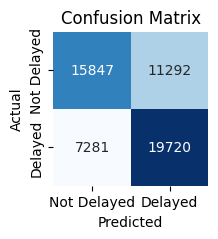

In [ ]:
knn_b_cm = confusion_matrix(y_val,knn_b_result)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(knn_b_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 14

In [ ]:
# Train an RandomForest model ON BALANCED dataset
rfc_b = RandomForestClassifier()
rfc_b.fit(X_train,y_train)

# Make predictions on the test set
rfc_b_res = rfc_b.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, rfc_b_res))
print("Classification Report:")
print(classification_report(y_val, rfc_b_res))
print(confusion_matrix(y_val, rfc_b_res))

Accuracy: 0.7468969338751386
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75     27034
           1       0.75      0.75      0.75     27106

    accuracy                           0.75     54140
   macro avg       0.75      0.75      0.75     54140
weighted avg       0.75      0.75      0.75     54140

[[20135  6899]
 [ 6804 20302]]


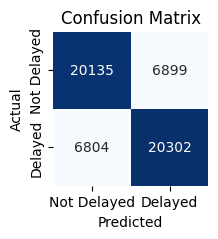

In [ ]:
rfc_b_cm = confusion_matrix(y_val, rfc_b_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(rfc_b_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
models=[dt_b,lr_model,knn_b,nb_b]

In [ ]:
md=[]
for i in models:
    md.append((str(i)[:-2],i))
md

[('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('LogisticRegression', LogisticRegression()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('GaussianNB', GaussianNB())]

In [ ]:
vc_b =VotingClassifier(md)

# Model 15

In [ ]:
# Voting Classifiers
vc_b=VotingClassifier(md)
vc_b.fit(X_train,y_train)
vc_b_res=vc_b.predict(X_val)
print(f"{round(accuracy_score(y_val,vc_b_res)*100,2)} is the accuracy for {vc_b}")
print(classification_report(y_val,vc_b_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,vc_b_res))

65.09 is the accuracy for VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('LogisticRegression', LogisticRegression()),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('GaussianNB', GaussianNB())])
              precision    recall  f1-score   support

           0       0.64      0.70      0.67     27139
           1       0.67      0.60      0.63     27001

    accuracy                           0.65     54140
   macro avg       0.65      0.65      0.65     54140
weighted avg       0.65      0.65      0.65     54140

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[19081  8058]
 [10844 16157]]


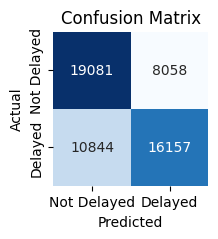

In [ ]:
vc_b_cm = confusion_matrix(y_val,vc_b_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(vc_b_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
gb_b=GradientBoostingClassifier()
ada_b=AdaBoostClassifier()
xgb_b=XGBClassifier()

In [ ]:
for mod in [gb_b,ada_b,xgb_b]:
    mod.fit(X_train,y_train)
    res=mod.predict(X_val)
    print(f"{round(accuracy_score(y_val,res)*100,2)} is the accuracy for {mod}")

67.98 is the accuracy for GradientBoostingClassifier()
64.12 is the accuracy for AdaBoostClassifier()
72.77 is the accuracy for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


# Model 16

In [ ]:
# XGBOOST CLASSIFIER
xgb_b=XGBClassifier()
xgb_b.fit(X_train,y_train)
xgb_b_res=xgb_b.predict(X_val)

print(classification_report(y_val,xgb_b_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,xgb_b_res))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     27139
           1       0.76      0.66      0.71     27001

    accuracy                           0.73     54140
   macro avg       0.73      0.73      0.73     54140
weighted avg       0.73      0.73      0.73     54140

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[21627  5512]
 [ 9232 17769]]


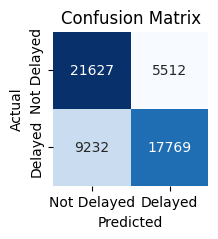

In [ ]:
xg_b_cm = confusion_matrix(y_val,xgb_b_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(xg_b_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 17

In [ ]:
# Gradient boosting Classifier on Balanced Data
gb_b=GradientBoostingClassifier()
gb_b.fit(X_train,y_train)
gb_b_res=gb_b.predict(X_val)

print(classification_report(y_val,gb_b_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,gb_b_res))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68     27139
           1       0.68      0.69      0.68     27001

    accuracy                           0.68     54140
   macro avg       0.68      0.68      0.68     54140
weighted avg       0.68      0.68      0.68     54140

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[18217  8922]
 [ 8412 18589]]


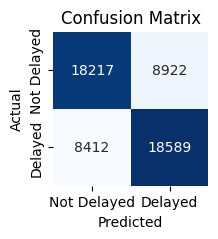

In [ ]:
gb_b_cm = confusion_matrix(y_val,gb_b_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(gb_b_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 18

In [ ]:
# AdaBoost Classifier on Balanced Data
ada_b=GradientBoostingClassifier()
ada_b.fit(X_train,y_train)
ada_b_res=ada_b.predict(X_val)

print(classification_report(y_val,ada_b_res))
print("-*-"*10)
print("Confusion Matrix\n",confusion_matrix(y_val,ada_b_res))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68     27139
           1       0.68      0.69      0.68     27001

    accuracy                           0.68     54140
   macro avg       0.68      0.68      0.68     54140
weighted avg       0.68      0.68      0.68     54140

-*--*--*--*--*--*--*--*--*--*-
Confusion Matrix
 [[18216  8923]
 [ 8412 18589]]


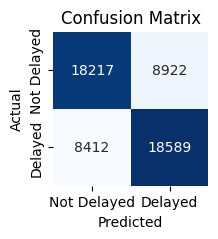

In [ ]:
ada_b_cm = confusion_matrix(y_val,ada_b_res)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(ada_b_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 19 - Random Forest - Hyper Parameter Tuning using Random Search CV

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations as needed
    cv=5,       # Number of cross-validation folds
    scoring='accuracy',  # Choose an appropriate scoring metric
    random_state=42,     # Set random state for reproducibility
    n_jobs=-1             # Use all available CPU cores
)

# Fit the model with the training data
random_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val)

# Display the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 40, 'criterion': 'gini', 'bootstrap': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     27139
           1       0.75      0.75      0.75     27001

    accuracy                           0.75     54140
   macro avg       0.75      0.75      0.75     54140
weighted avg       0.75      0.75      0.75     54140

Confusion Matrix:
 [[20269  6870]
 [ 6667 20334]]


### FINAL EVALUATION ON TEST DATA USING RANDOM FOREST CLASSIFIER

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Resume Projects/Lexis Nexis Project/final_test_df.csv')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      5786 non-null   float64
 1   sched_dep_time           5786 non-null   float64
 2   sched_arr_time           5786 non-null   float64
 3   duration                 5786 non-null   float64
 4   tail_delay_percent       5786 non-null   float64
 5   tail_arr_delay           5786 non-null   float64
 6   Carr_Dest_Arrival_delay  5786 non-null   float64
 7   Carr_Day_Arrival_delay   5786 non-null   float64
 8   flight_encoded           5786 non-null   float64
 9   tailnum_encoded          5786 non-null   float64
 10  lateflight               5786 non-null   float64
dtypes: float64(11)
memory usage: 497.4 KB


In [ ]:
rfc_b

RandomForestClassifier()

In [ ]:
X = test_df.drop('lateflight',axis=1)
y = test_df['lateflight']

# Test Predictions

1. Random Forest Classifier

In [ ]:
test_pred = rfc_b.predict(X)

In [ ]:
test_pred

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y, test_pred))
print("Classification Report:")
print(classification_report(y, test_pred))
print(confusion_matrix(y, test_pred))

Accuracy: 0.5076045627376425
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.27      0.37      3088
         1.0       0.48      0.78      0.60      2698

    accuracy                           0.51      5786
   macro avg       0.53      0.52      0.48      5786
weighted avg       0.54      0.51      0.48      5786

[[ 841 2247]
 [ 602 2096]]


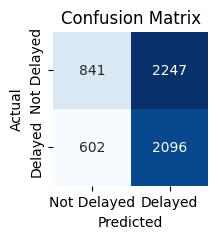

In [ ]:
test_cm = confusion_matrix(y, test_pred)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()